In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde, norm
import wave

In [7]:
features_df = pd.read_csv(r'C:\Users\dishi\OneDrive\Desktop\daiict\audio_features.csv')

In [8]:
real_data = features_df[features_df['label'] == 'real']
fake_data = features_df[features_df['label'] == 'fake']

In [9]:
def plot_aggregated_features(real_data, fake_data, feature_column, feature_name, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    
    # Plot real data
    plt.subplot(1, 2, 1)
    feature_values = real_data[feature_column]
    sns.histplot(feature_values, bins=100, kde=True, color='blue', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Real {feature_name}')
    plt.grid(True)

    # Plot fake data
    plt.subplot(1, 2, 2)
    feature_values = fake_data[feature_column]
    sns.histplot(feature_values, bins=100, kde=True, color='red', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Fake {feature_name}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [10]:
def plot_kde(real_data, fake_data, feature_column, feature_name, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    
    # Plot real data
    plt.subplot(1, 2, 1)
    feature_values = real_data[feature_column]
    sns.kdeplot(feature_values, bw_adjust=0.5, color='blue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Real {feature_name}')
    plt.grid(True)

    # Plot fake data
    plt.subplot(1, 2, 2)
    feature_values = fake_data[feature_column]
    sns.kdeplot(feature_values, bw_adjust=0.5, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Fake {feature_name}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [11]:
def plot_pdf(real_data, fake_data, feature_column, feature_name, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    
    # Plot real data
    plt.subplot(1, 2, 1)
    feature_values = real_data[feature_column]
    x_values = np.linspace(feature_values.min(), feature_values.max(), 1000)
    kde = gaussian_kde(feature_values, bw_method=0.5)
    plt.plot(x_values, kde(x_values), color='blue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Real {feature_name}')
    plt.grid(True)

    # Plot fake data
    plt.subplot(1, 2, 2)
    feature_values = fake_data[feature_column]
    x_values = np.linspace(feature_values.min(), feature_values.max(), 1000)
    kde = gaussian_kde(feature_values, bw_method=0.5)
    plt.plot(x_values, kde(x_values), color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Fake {feature_name}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [12]:
def plot_cdf(real_data, fake_data, feature_column, feature_name, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    
    # Plot real data
    plt.subplot(1, 2, 1)
    feature_values = real_data[feature_column]
    x_values = np.linspace(feature_values.min(), feature_values.max(), 1000)
    kde = gaussian_kde(feature_values, bw_method=0.5)
    cdf = np.cumsum(kde(x_values)) / np.sum(kde(x_values))
    plt.plot(x_values, cdf, color='blue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Real {feature_name}')
    plt.grid(True)

    # Plot fake data
    plt.subplot(1, 2, 2)
    feature_values = fake_data[feature_column]
    x_values = np.linspace(feature_values.min(), feature_values.max(), 1000)
    kde = gaussian_kde(feature_values, bw_method=0.5)
    cdf = np.cumsum(kde(x_values)) / np.sum(kde(x_values))
    plt.plot(x_values, cdf, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Fake {feature_name}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [13]:
def plot_normal_pdf(real_data, fake_data, feature_column, feature_name, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    
    # Plot real data
    plt.subplot(1, 2, 1)
    feature_values = real_data[feature_column]
    mu, std = norm.fit(feature_values)
    x_values = np.linspace(feature_values.min(), feature_values.max(), 1000)
    pdf_fitted = norm.pdf(x_values, mu, std)
    plt.plot(x_values, pdf_fitted, color='blue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Real {feature_name}')
    plt.grid(True)

    # Plot fake data
    plt.subplot(1, 2, 2)
    feature_values = fake_data[feature_column]
    mu, std = norm.fit(feature_values)
    x_values = np.linspace(feature_values.min(), feature_values.max(), 1000)
    pdf_fitted = norm.pdf(x_values, mu, std)
    plt.plot(x_values, pdf_fitted, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Fake {feature_name}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [14]:
feature_columns = ['zero_crossing_rate', 'rms_energy', 'signal_mean', 'signal_std', 
                   'amplitude_envelope', 'spectral_centroid', 'spectral_bandwidth', 
                   'spectral_rolloff', 'skewness', 'kurtosis']

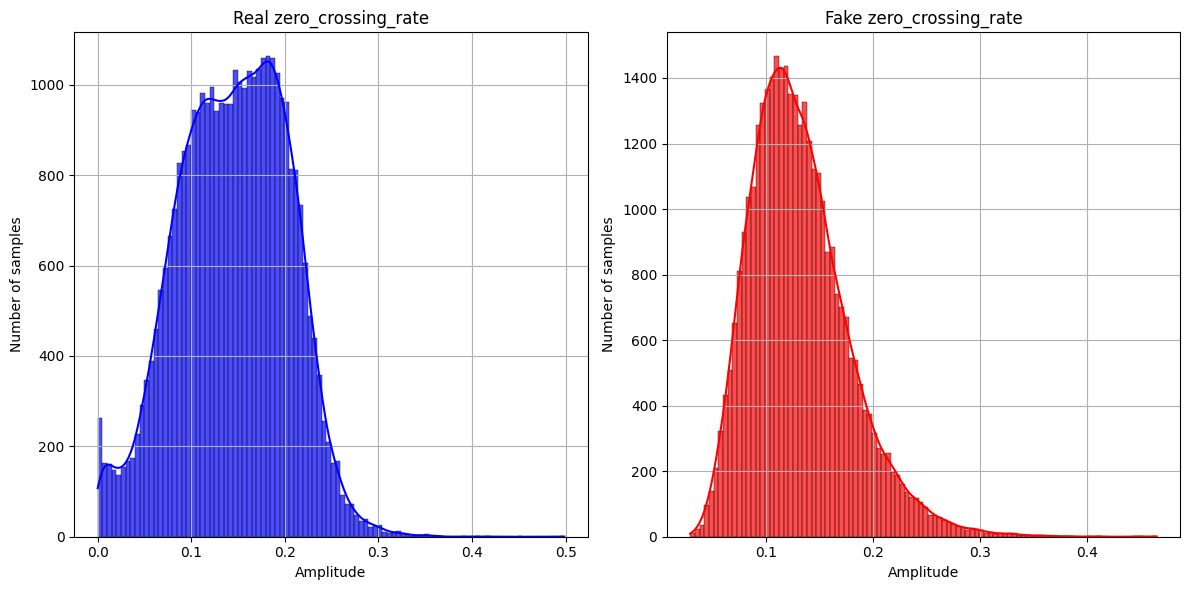

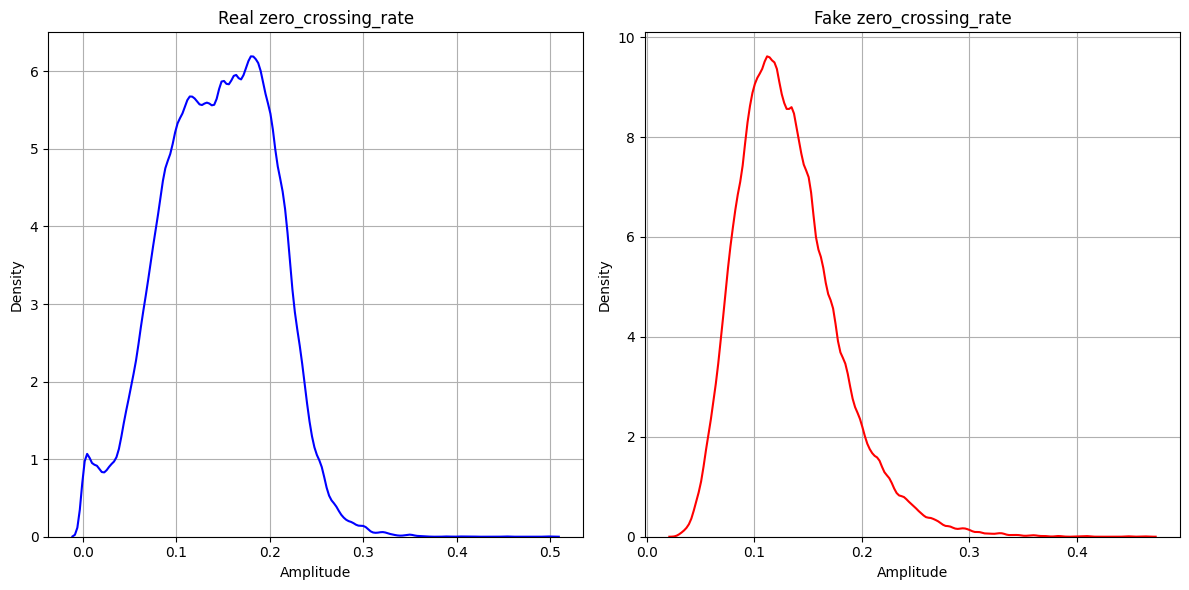

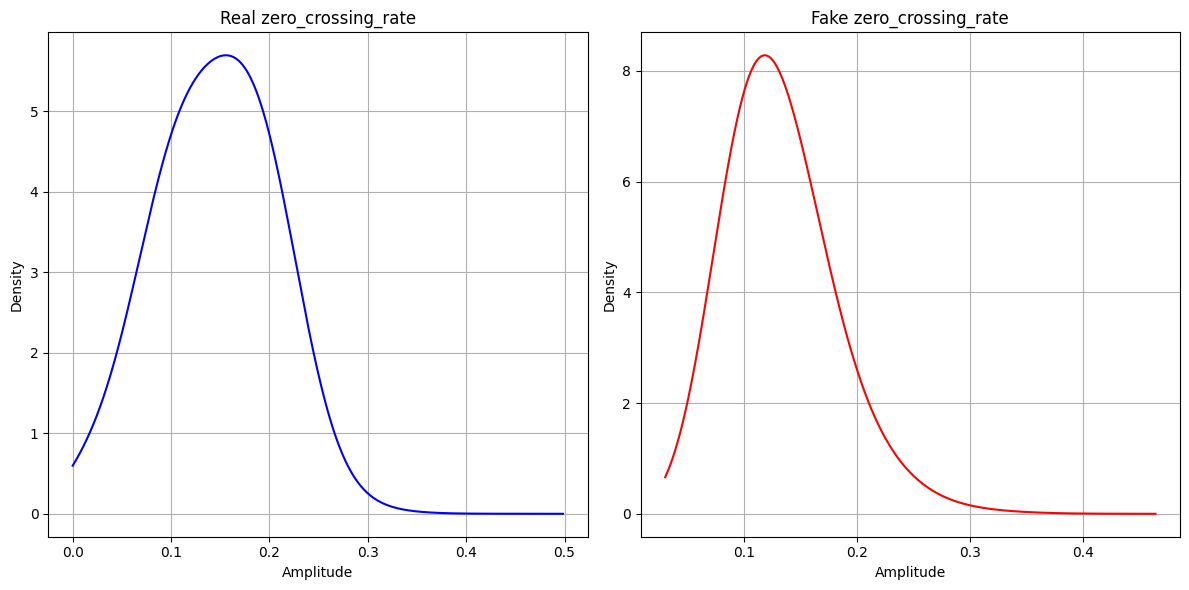

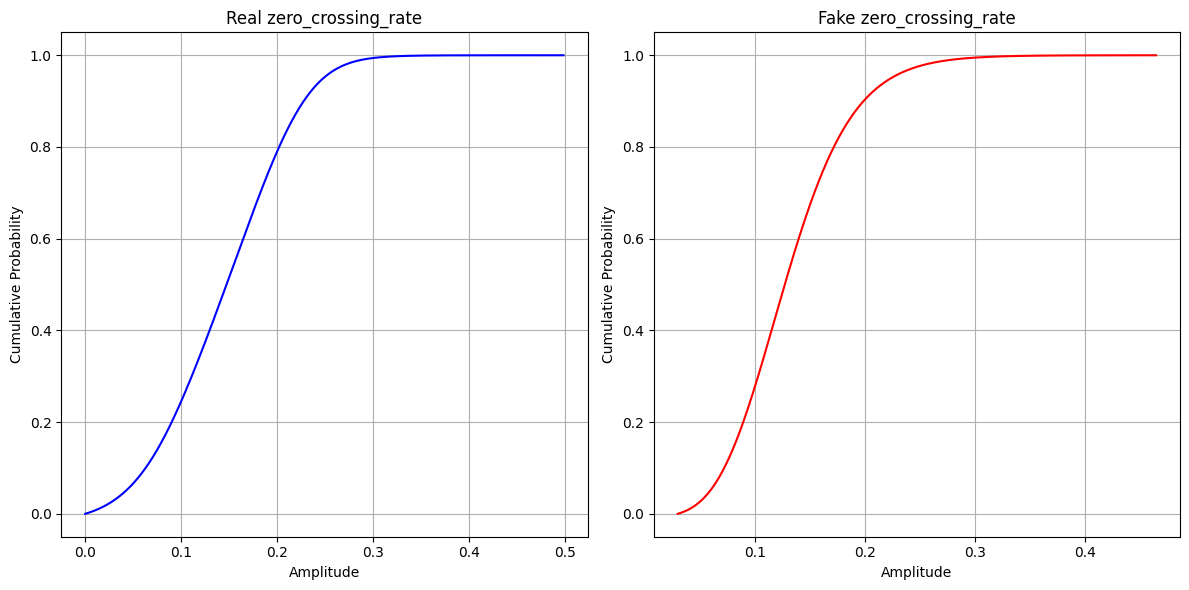

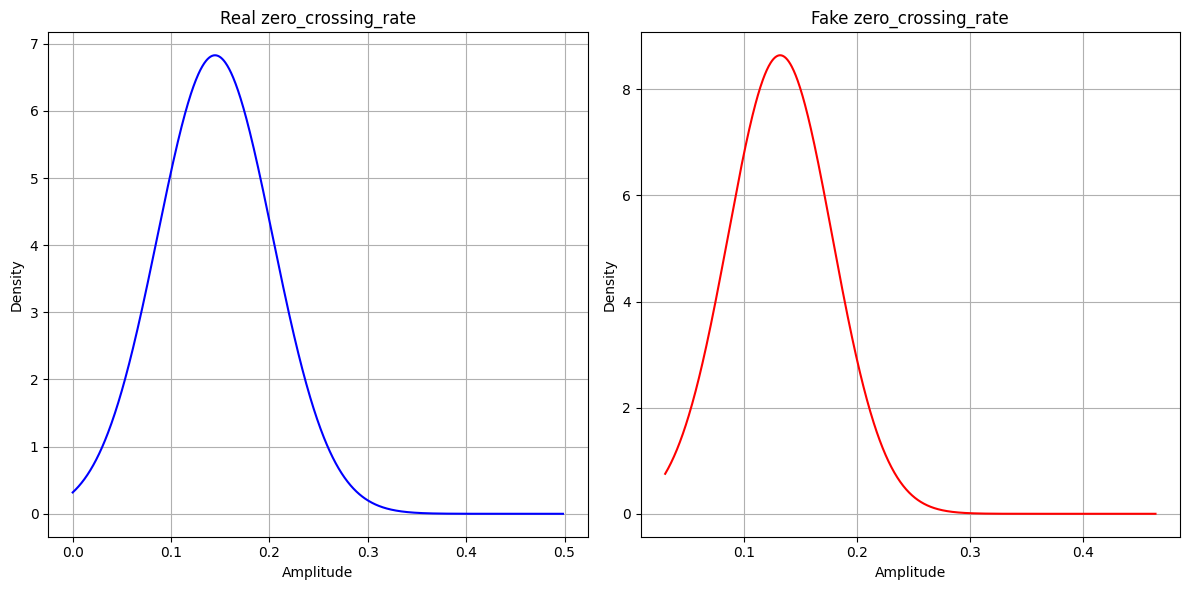

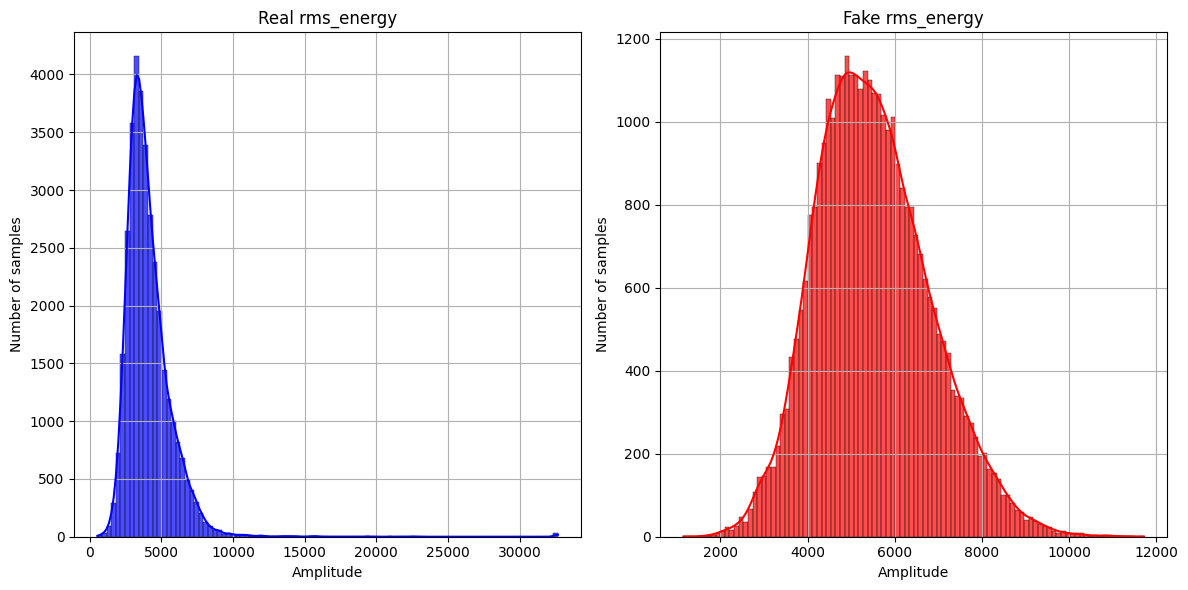

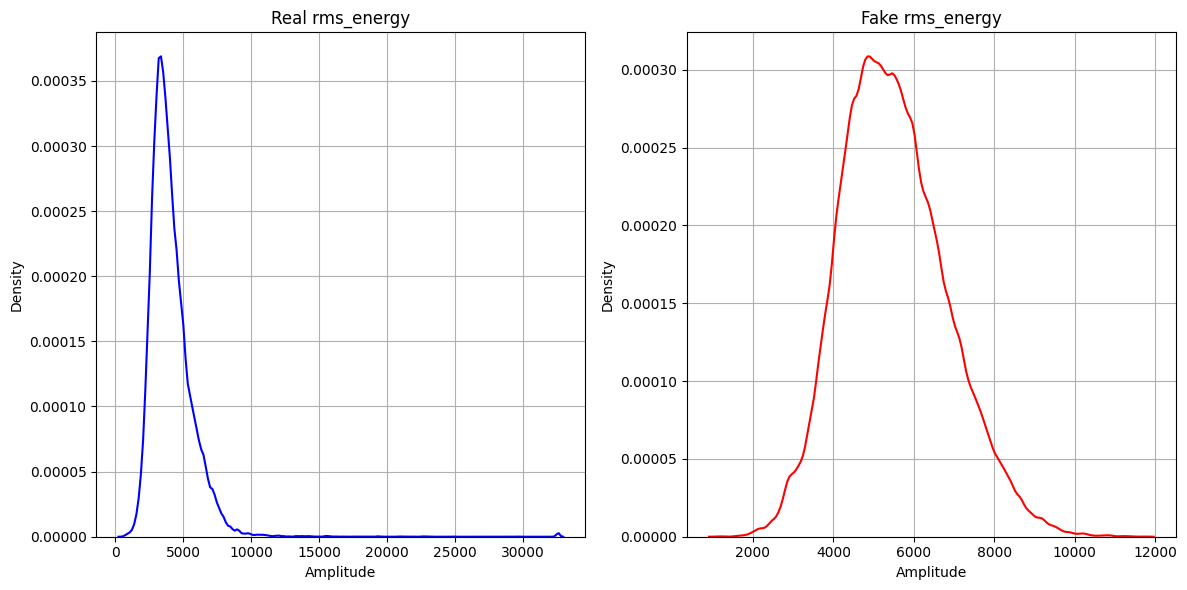

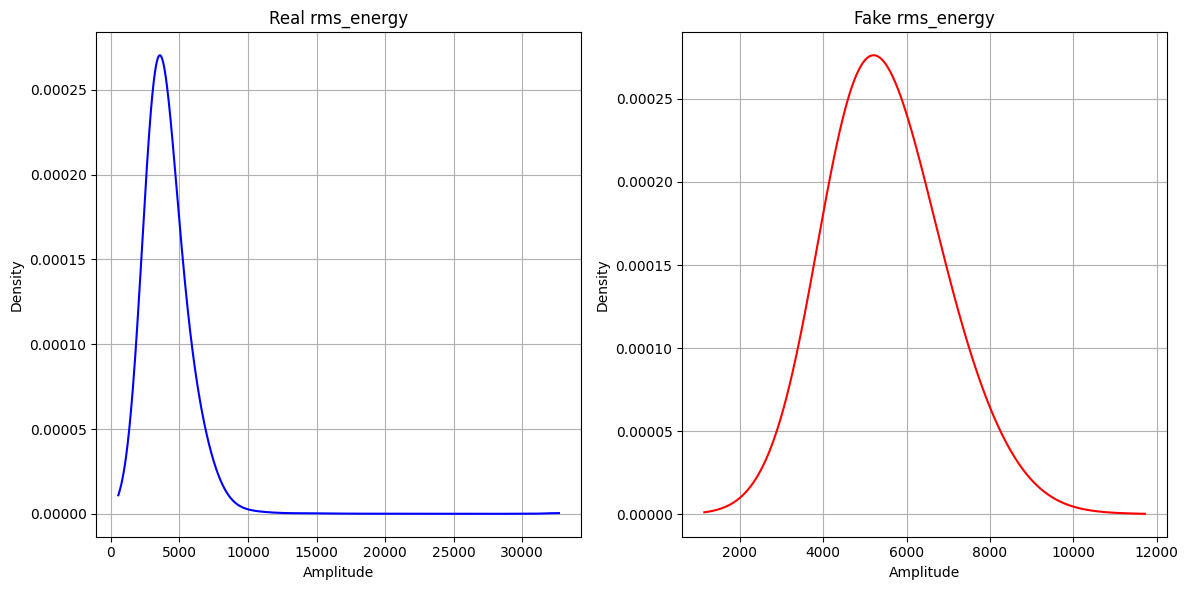

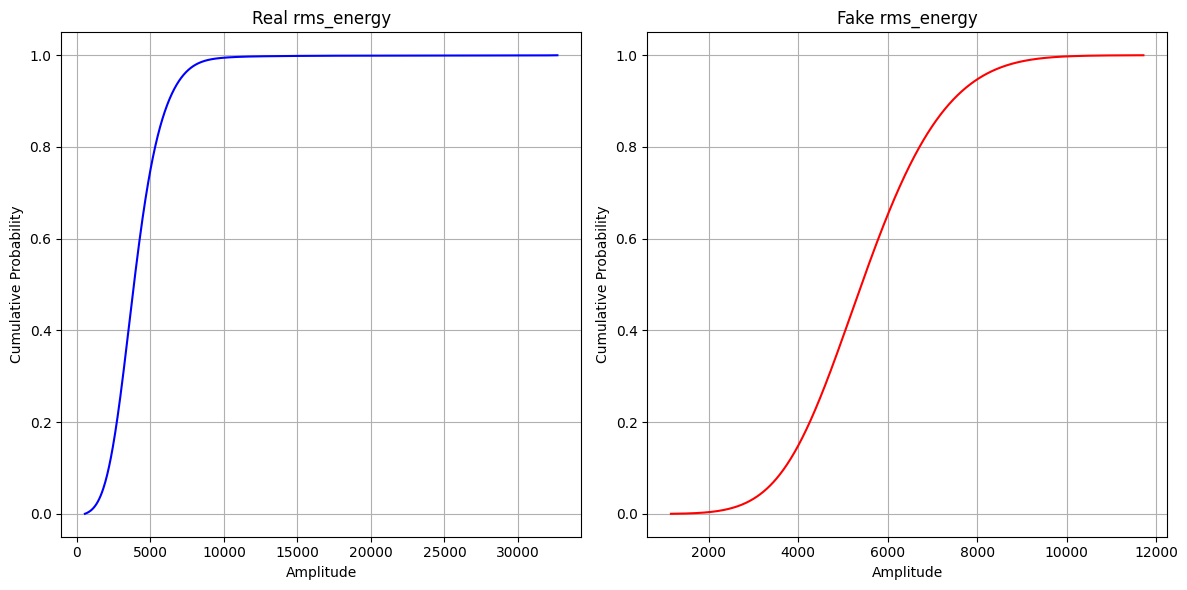

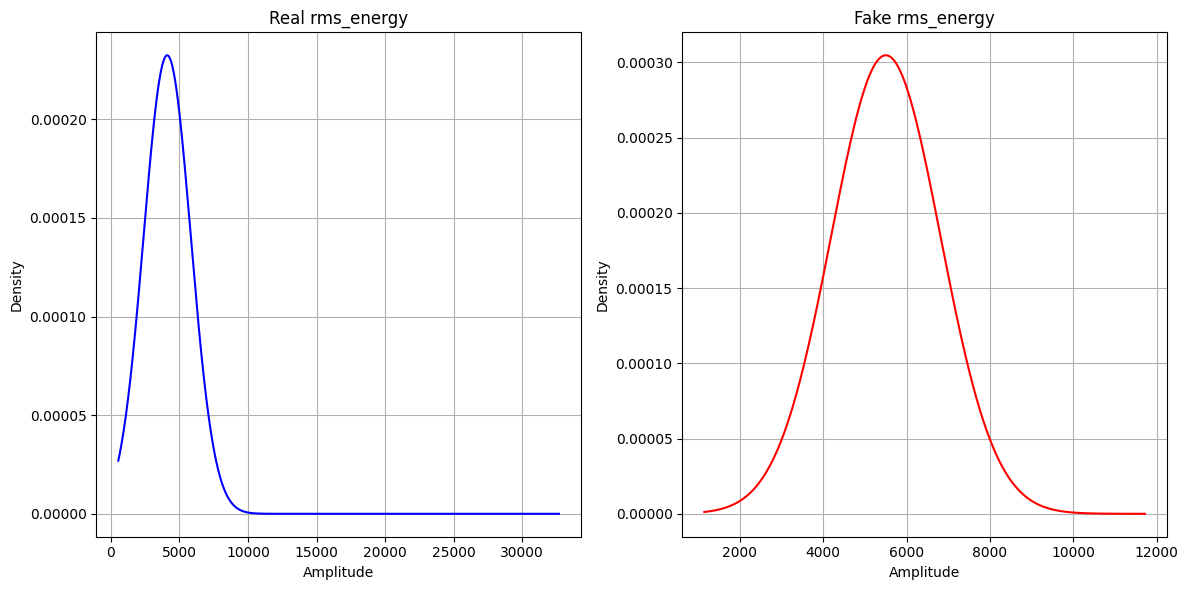

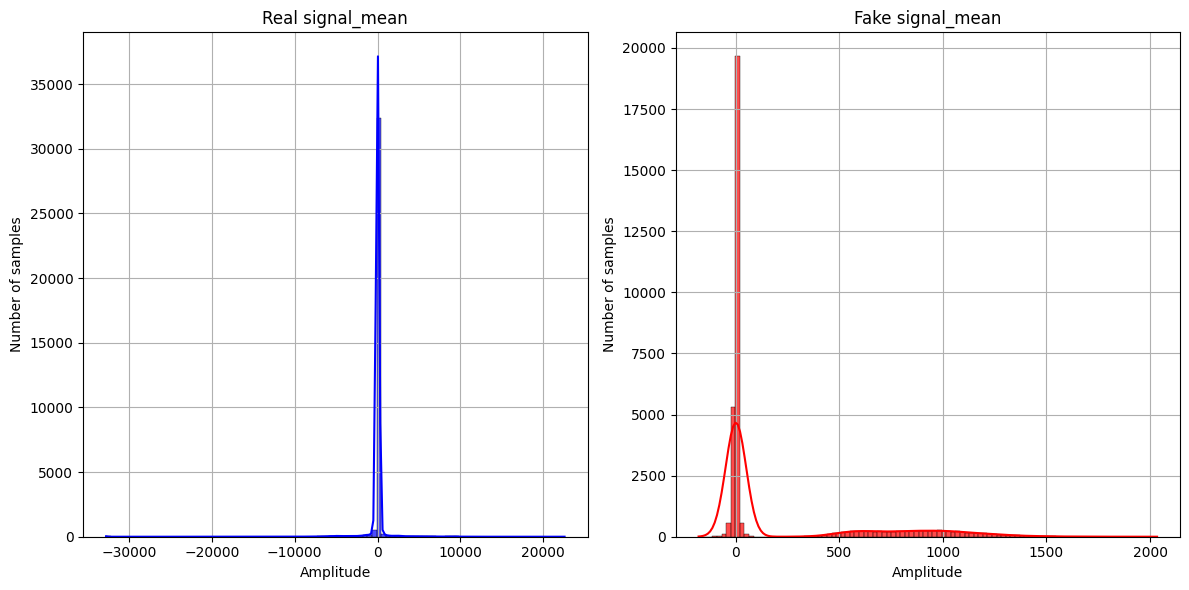

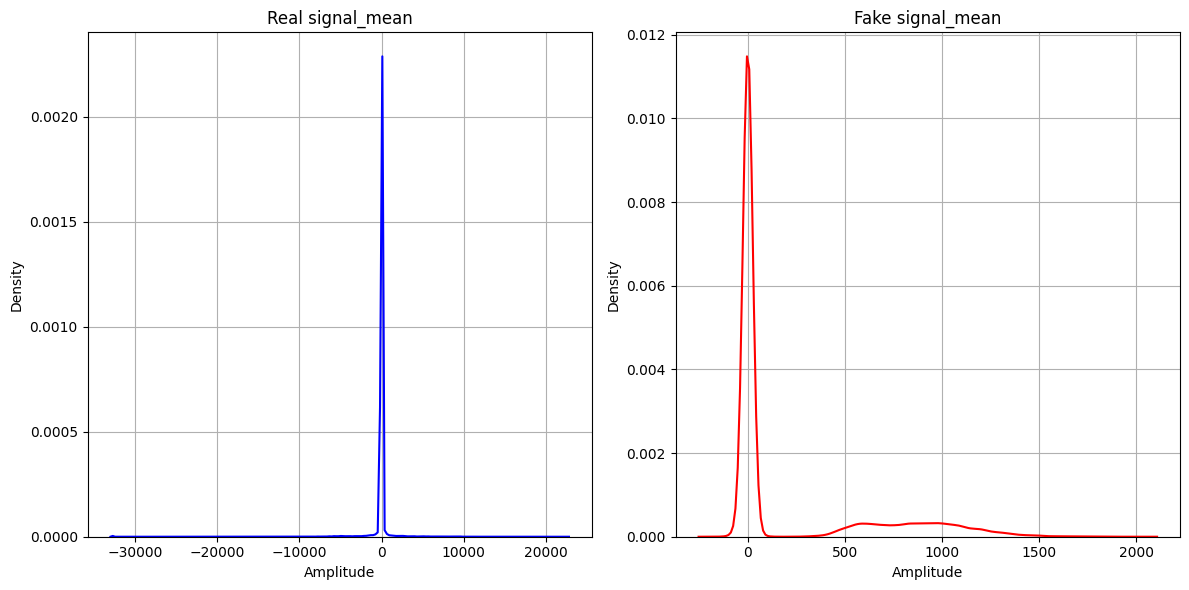

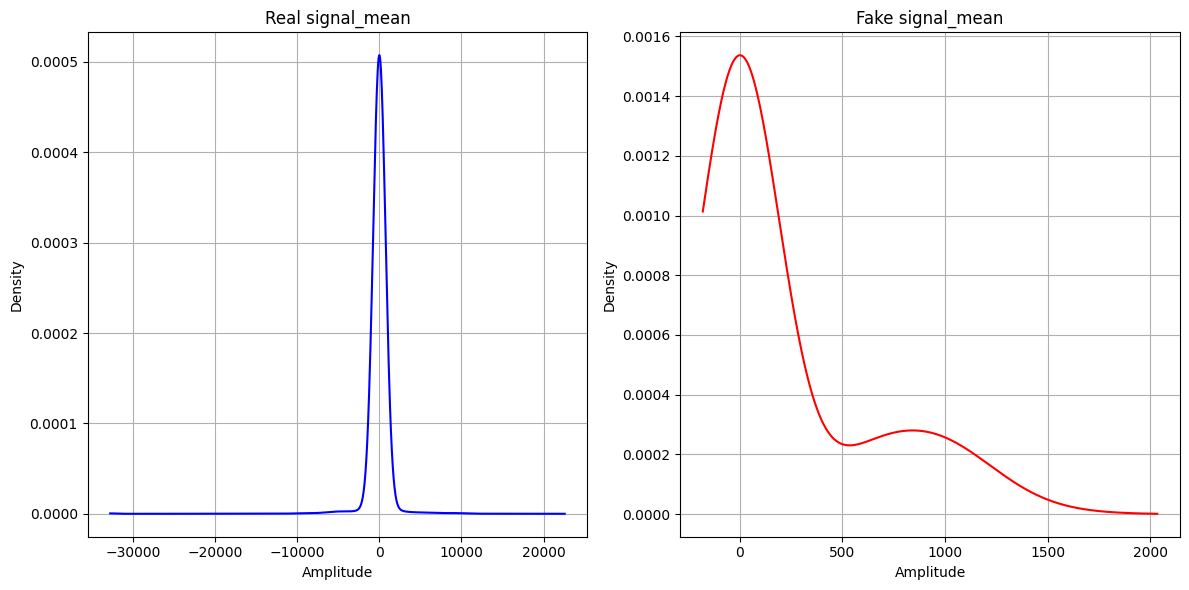

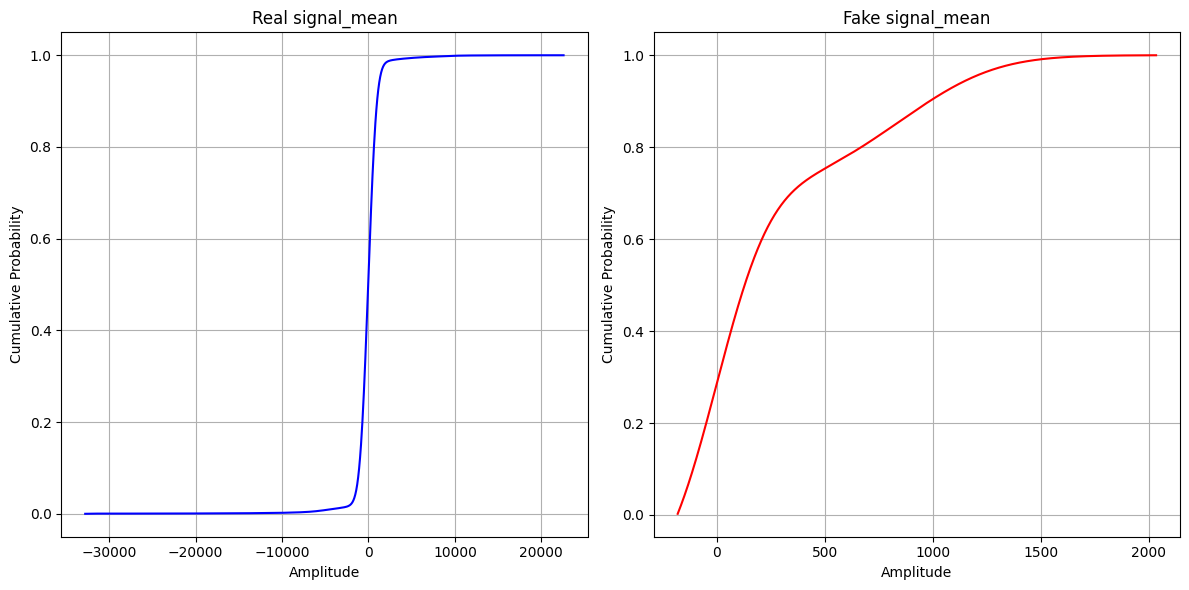

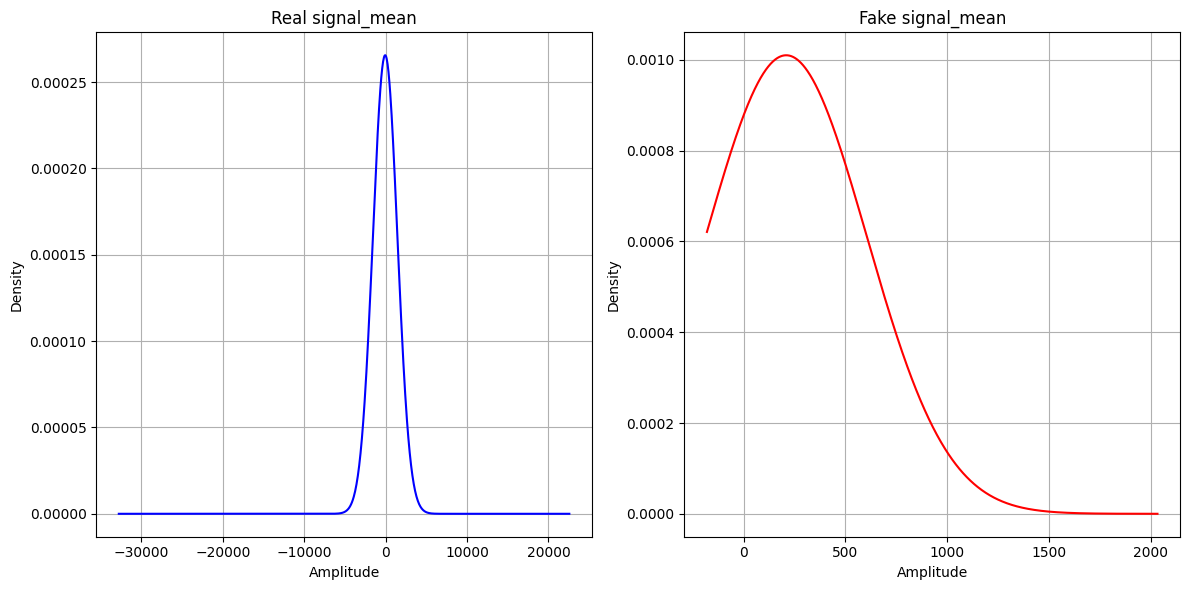

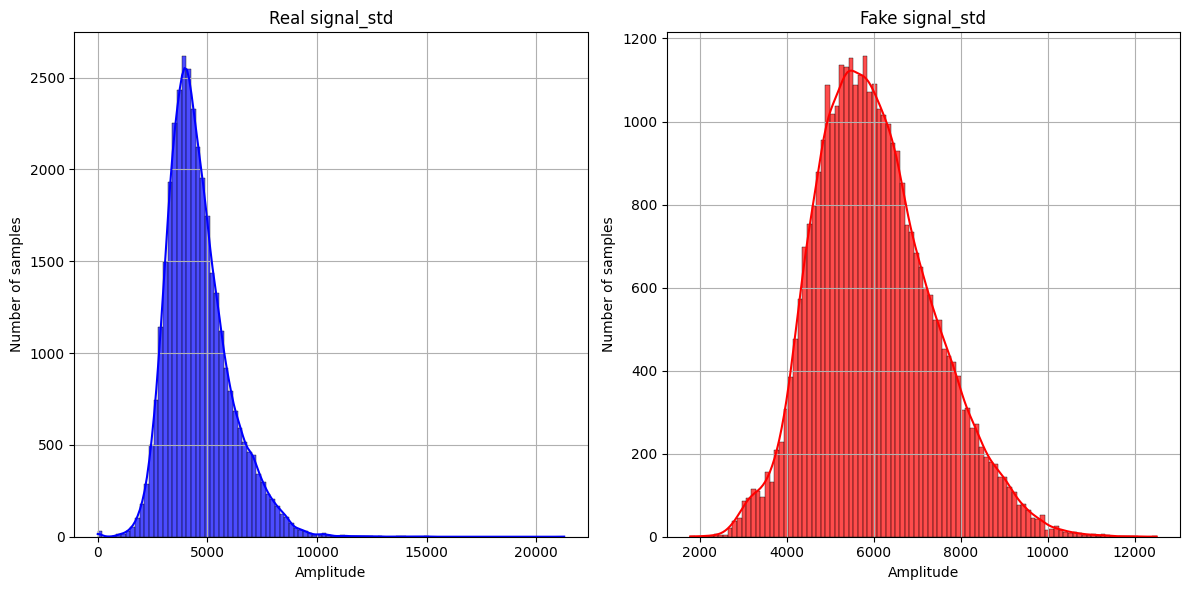

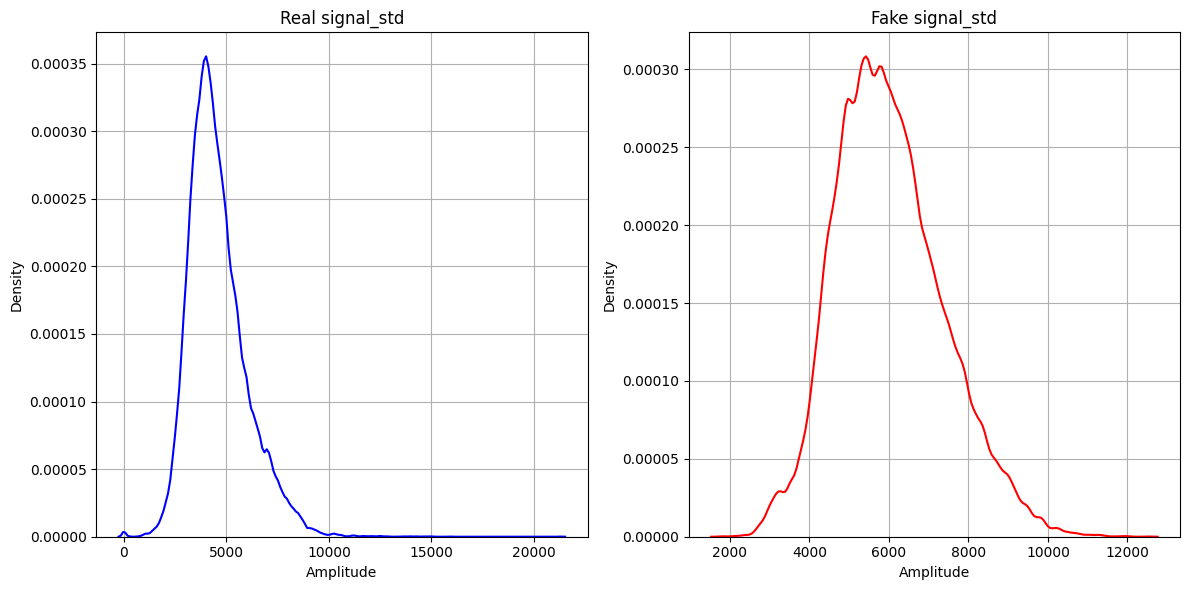

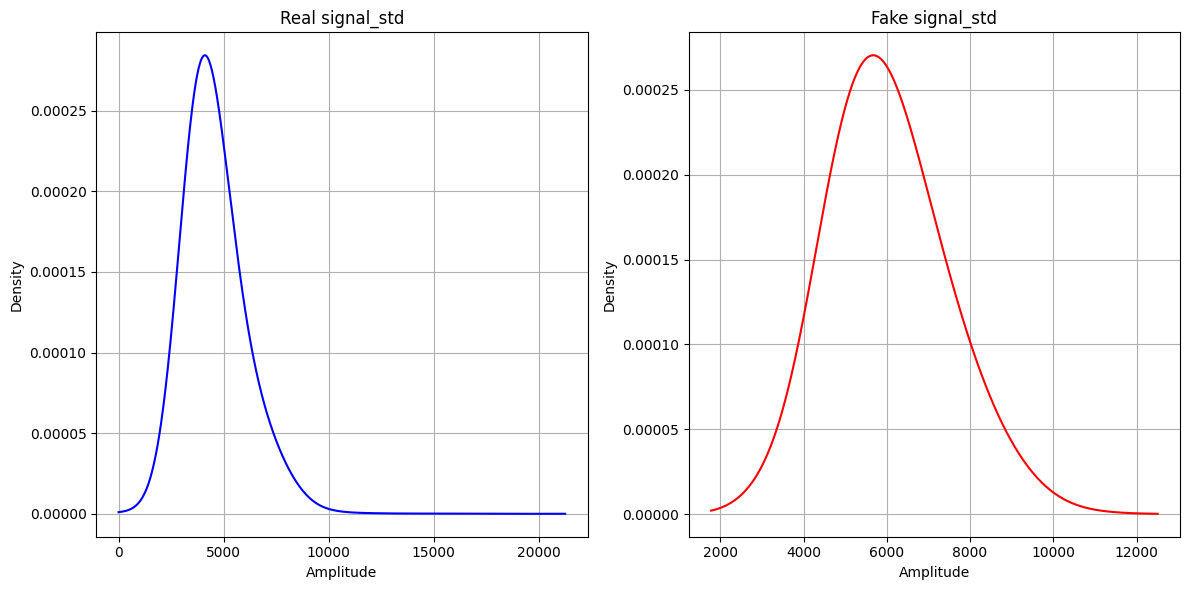

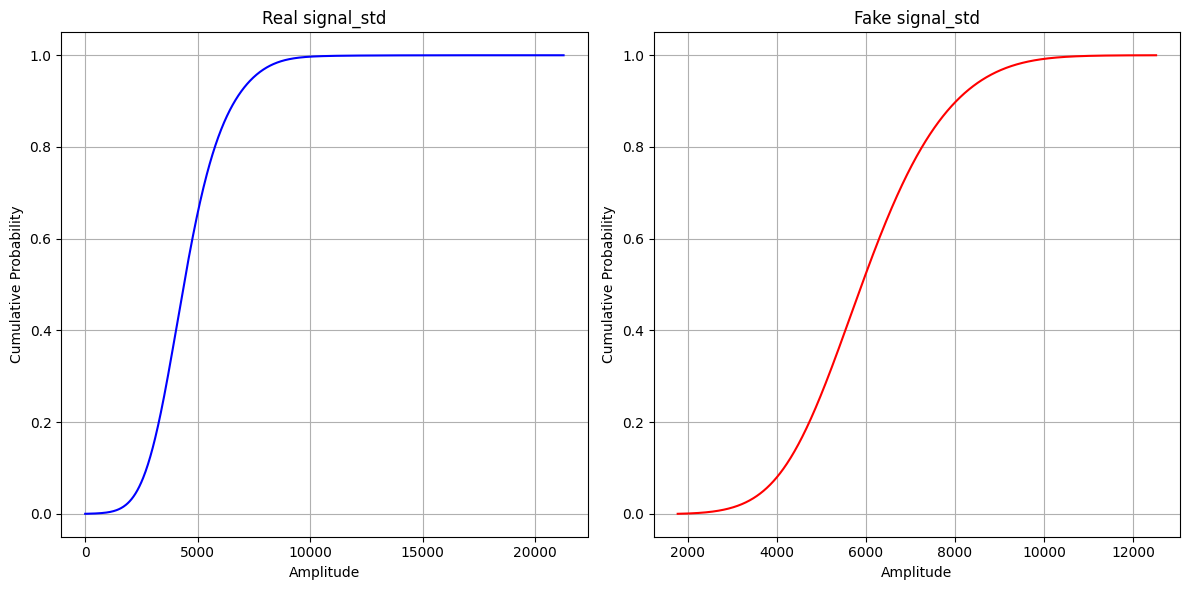

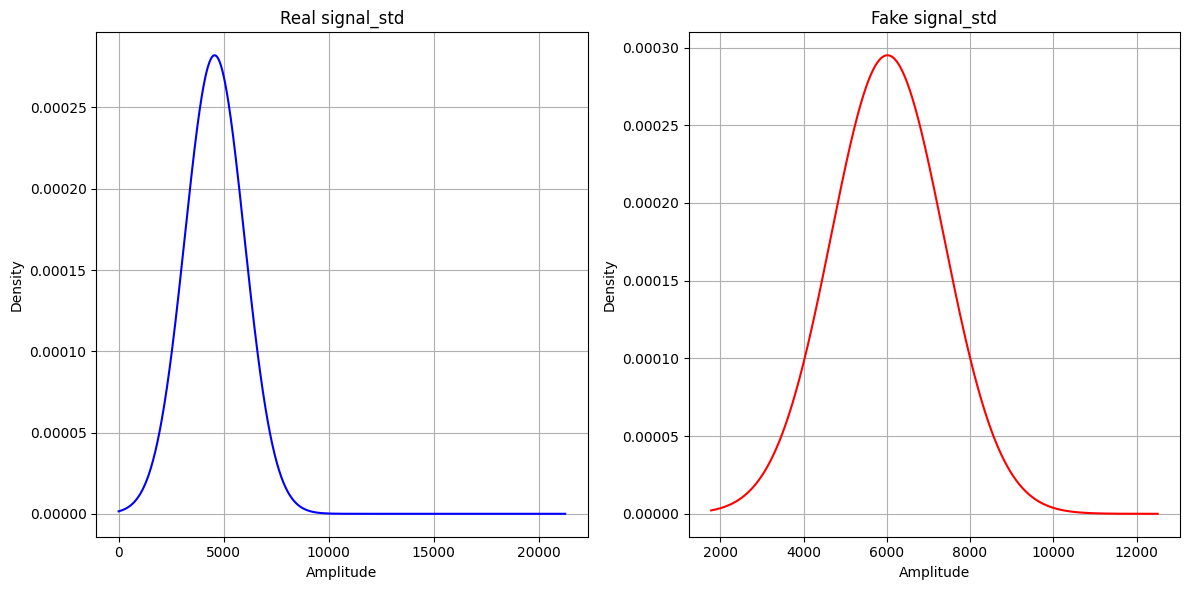

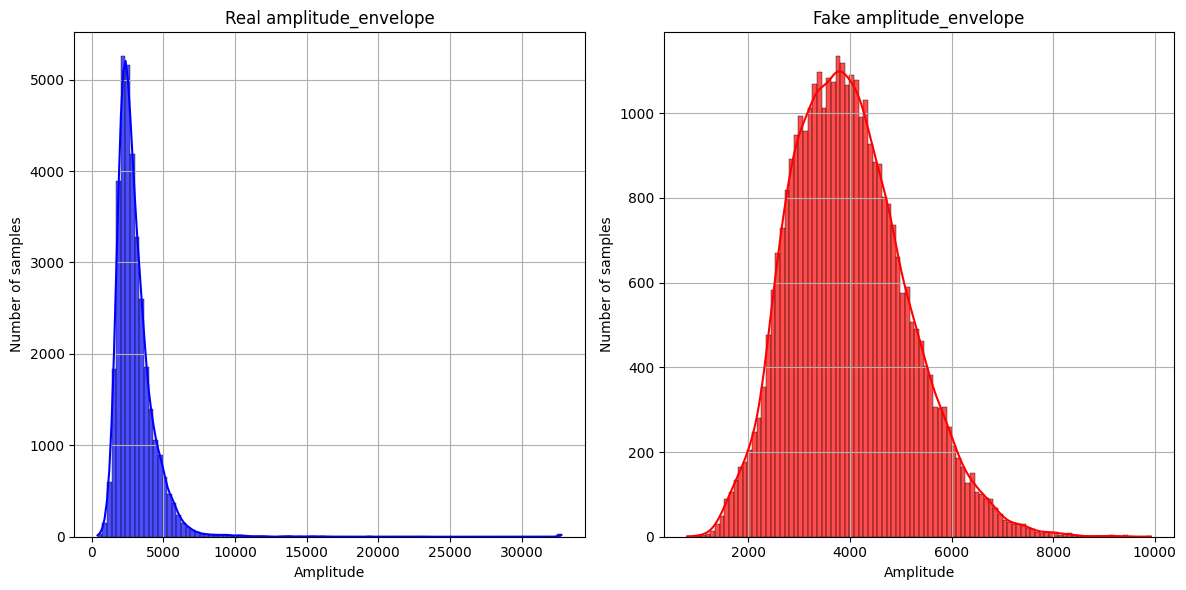

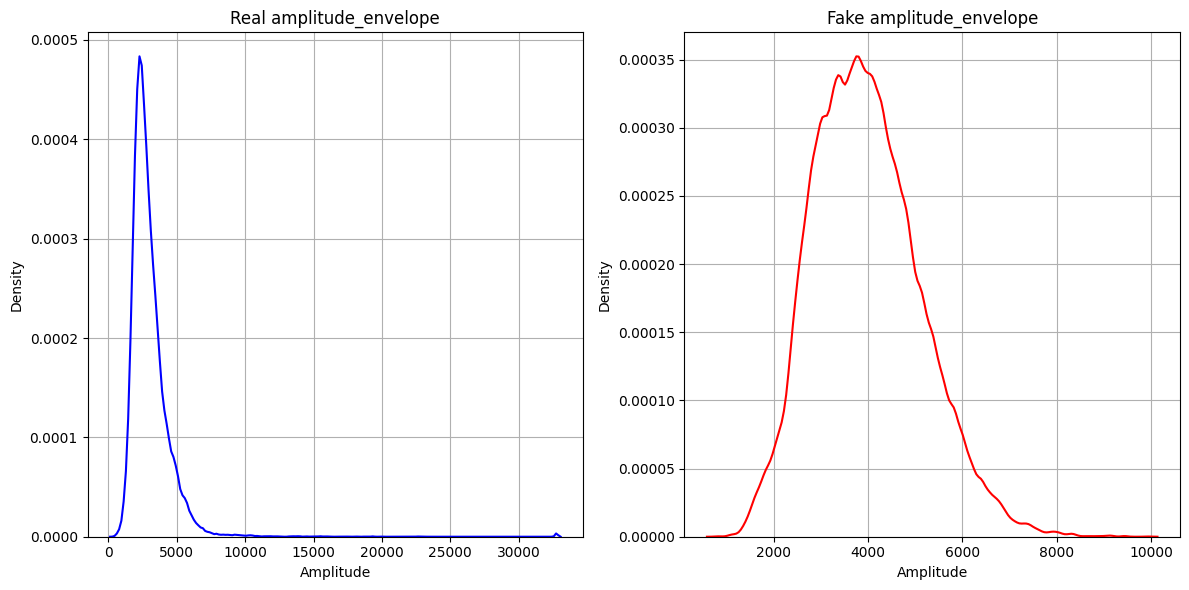

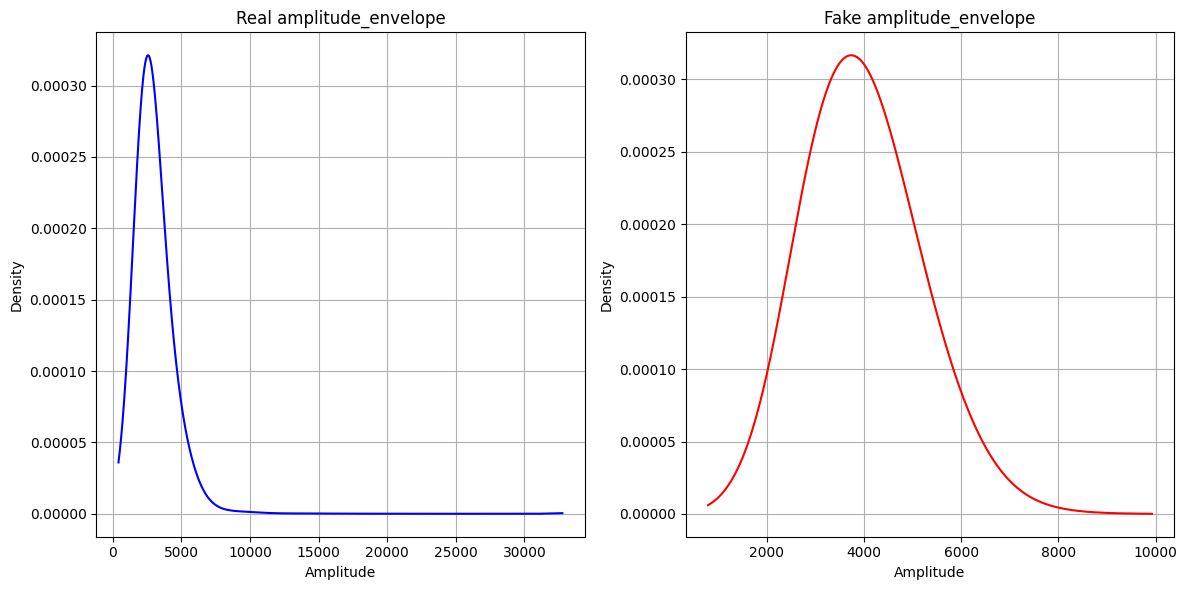

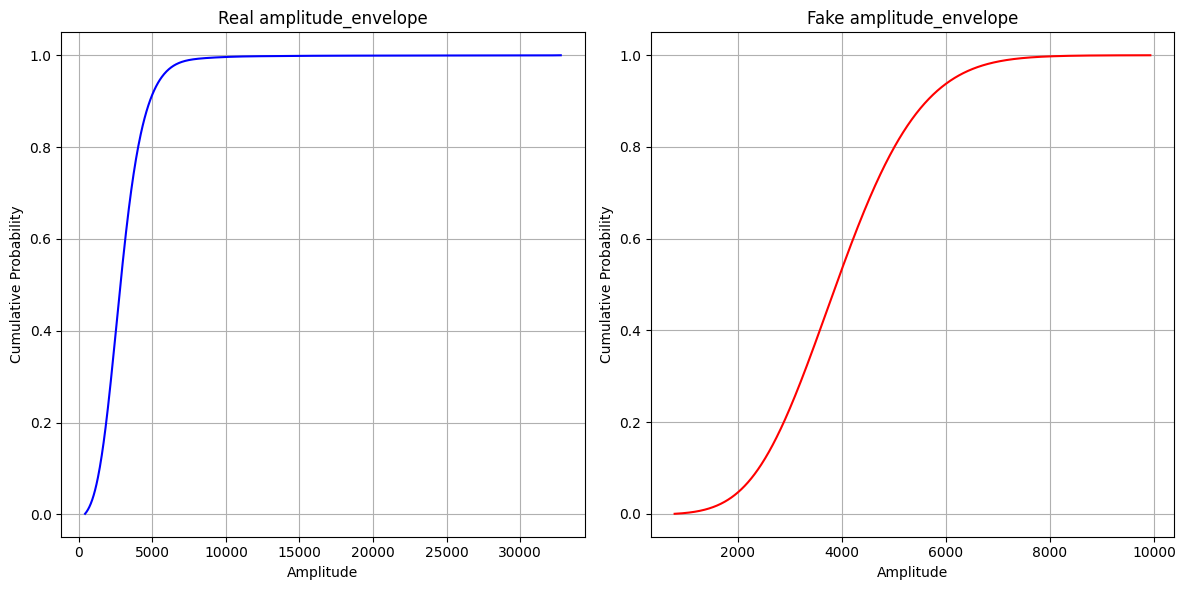

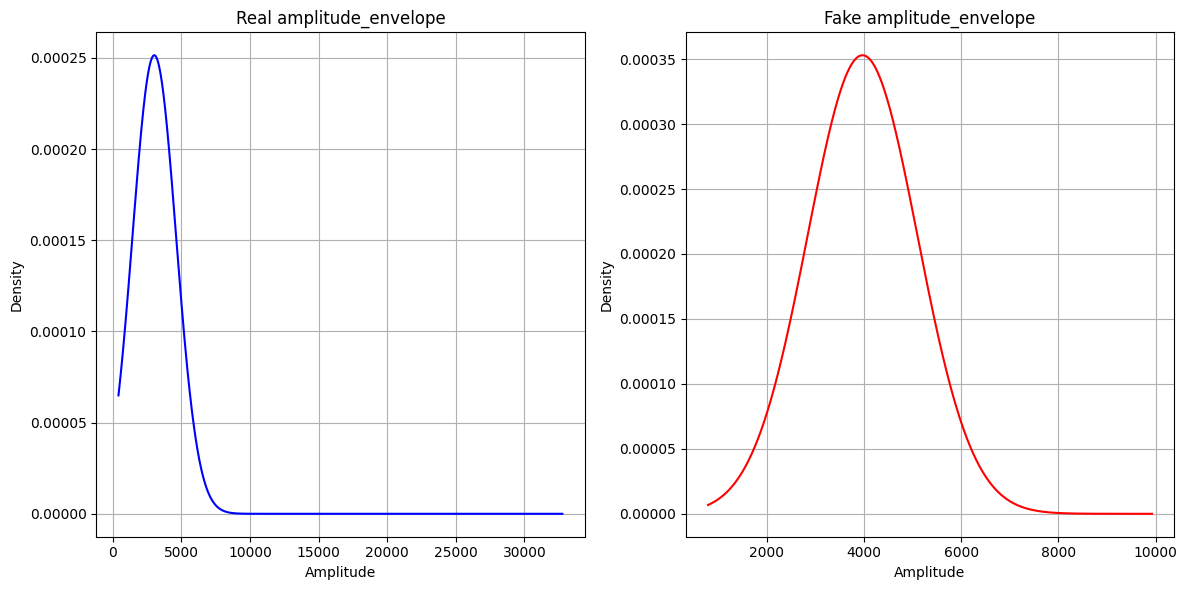

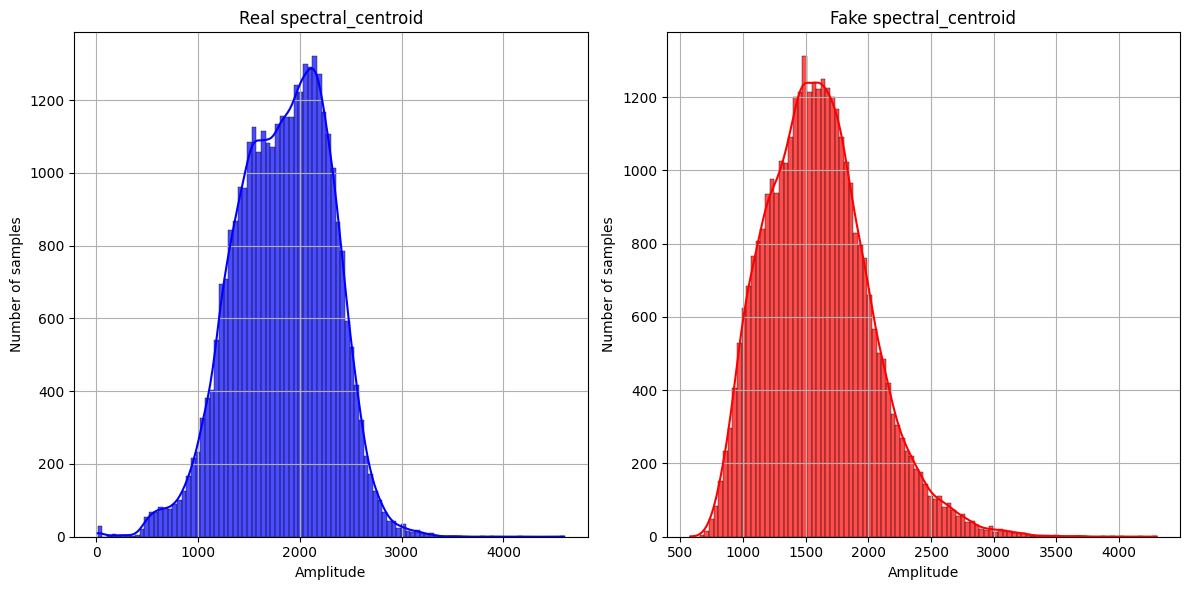

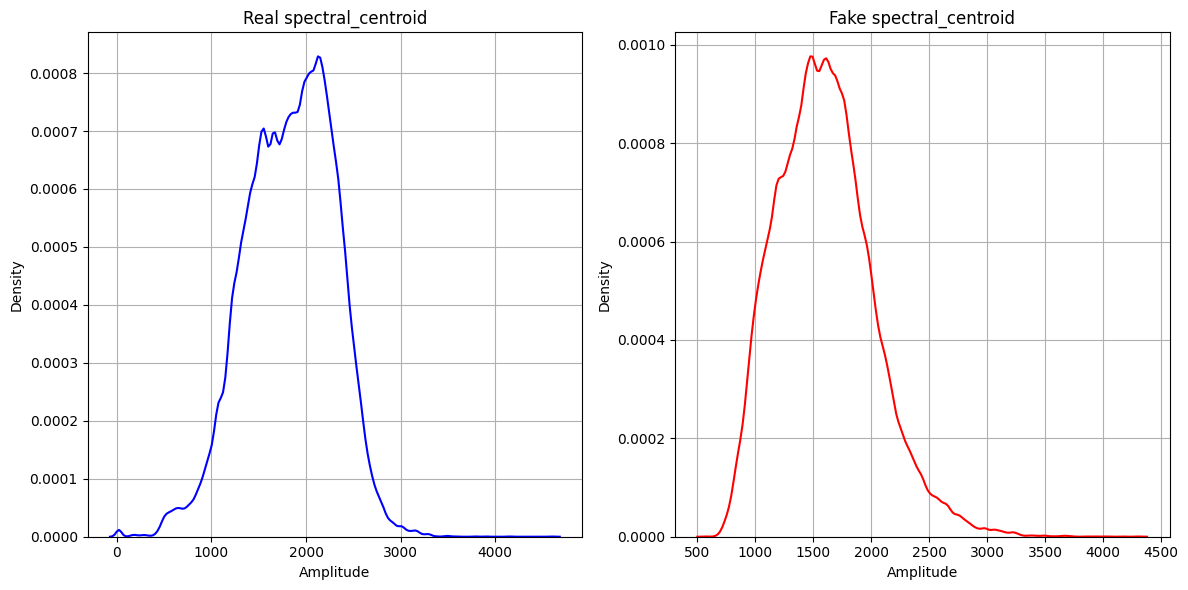

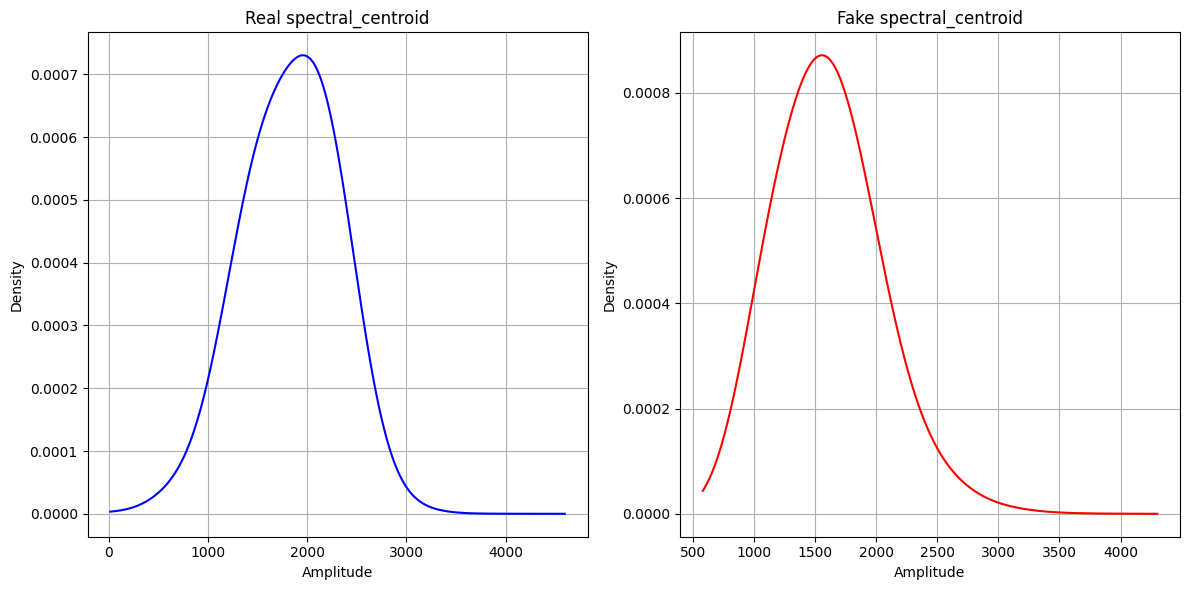

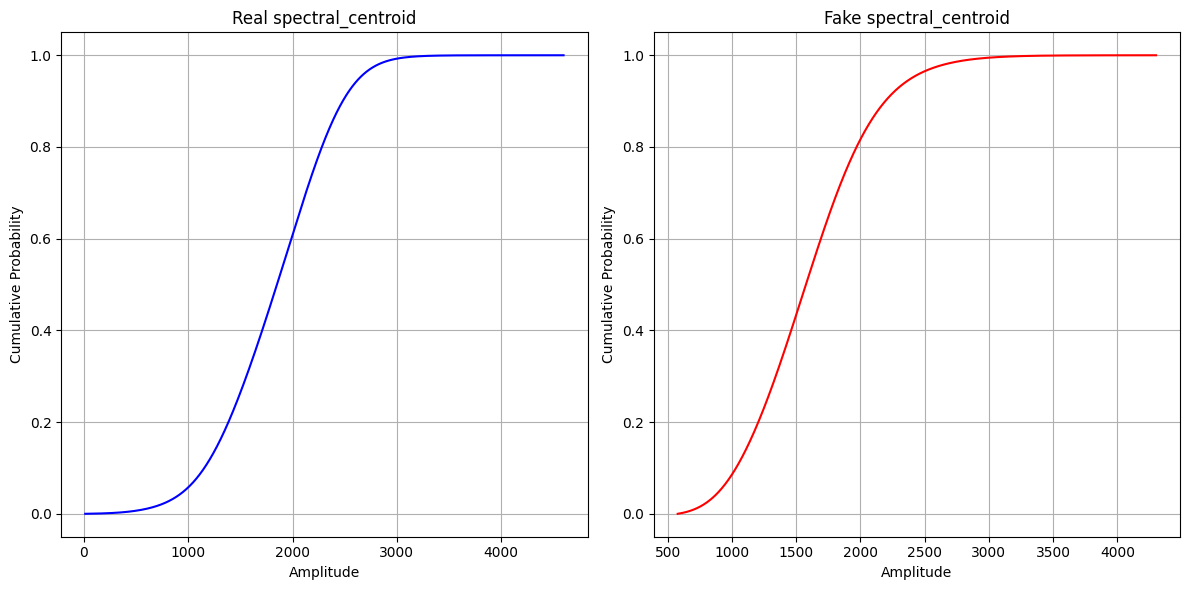

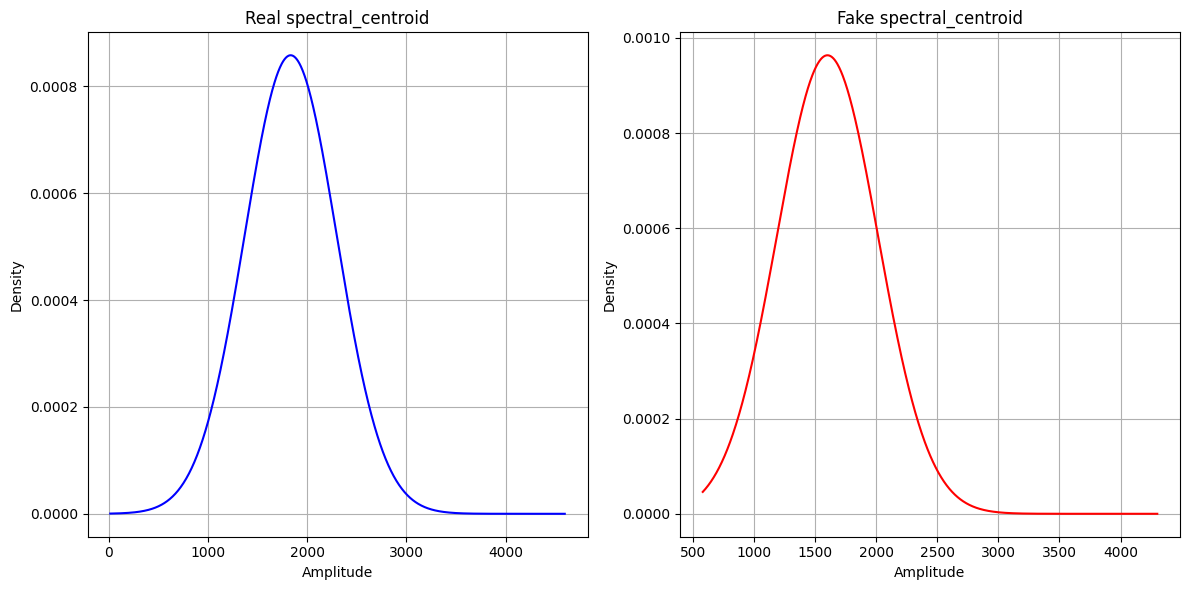

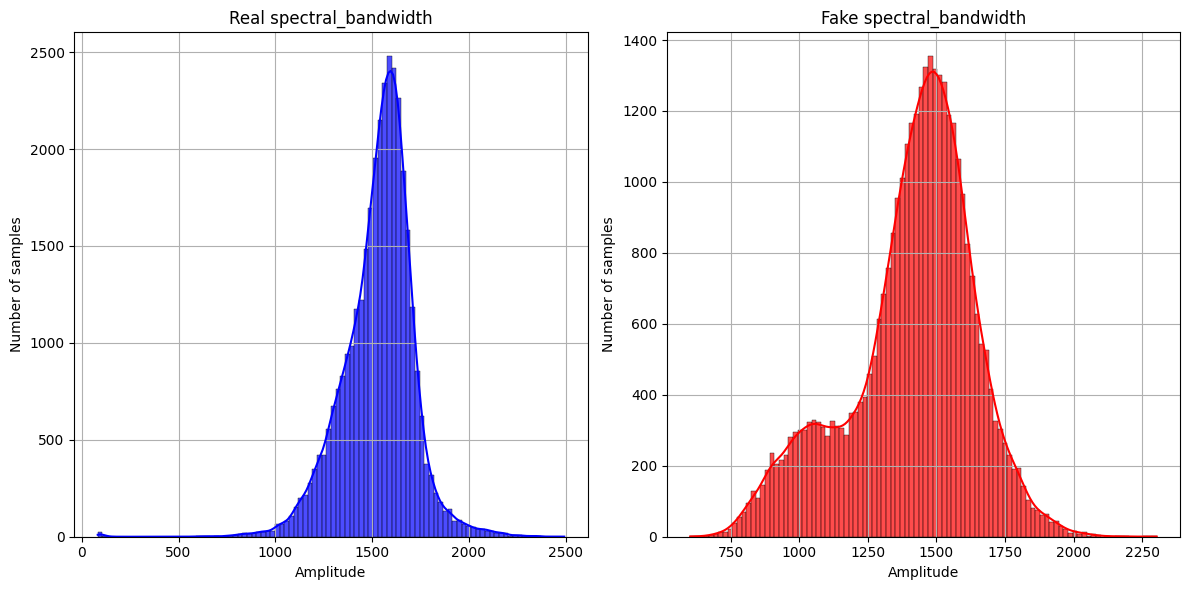

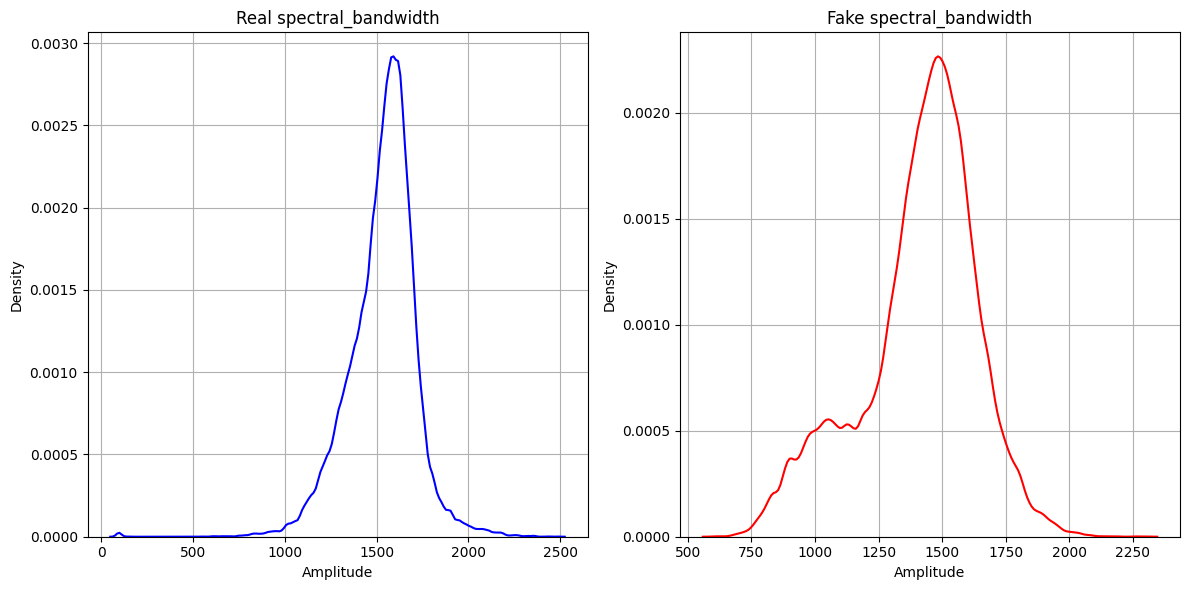

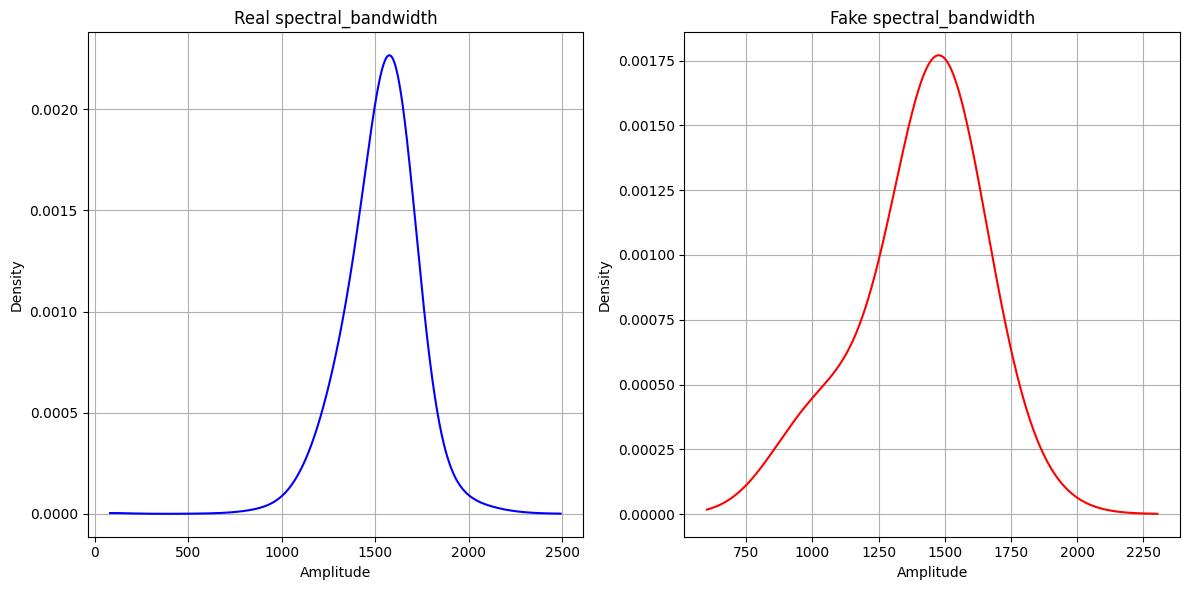

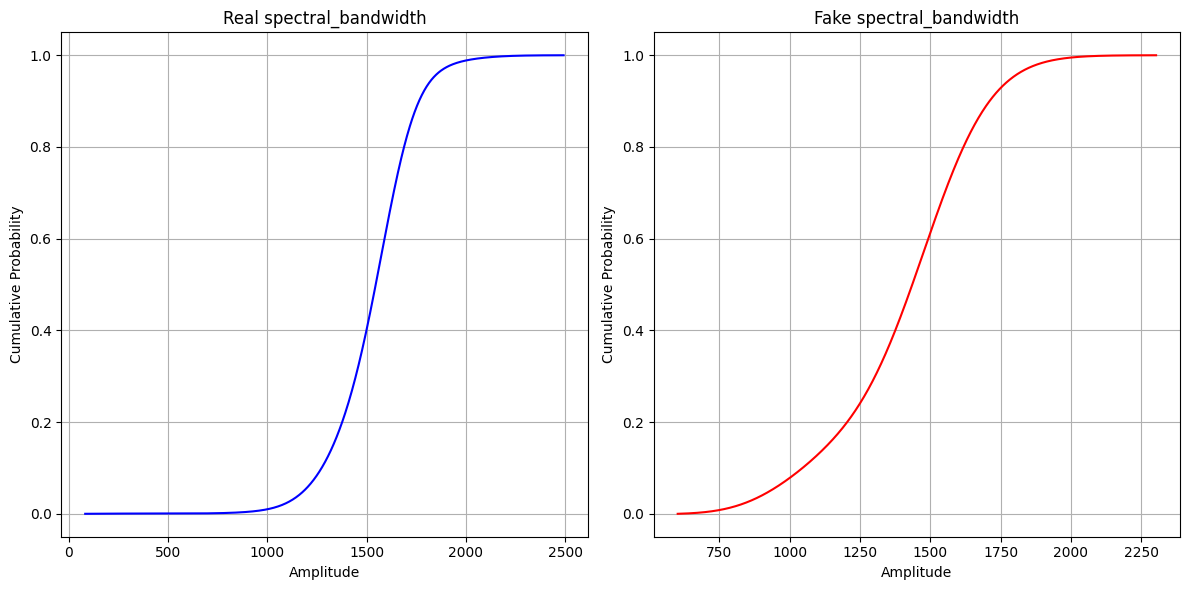

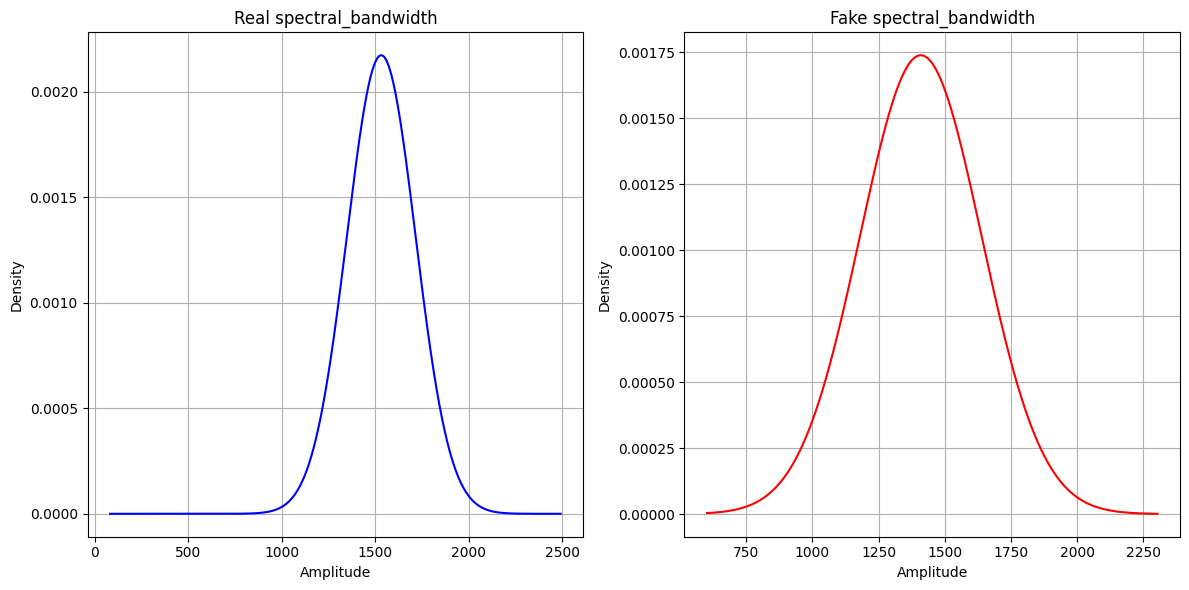

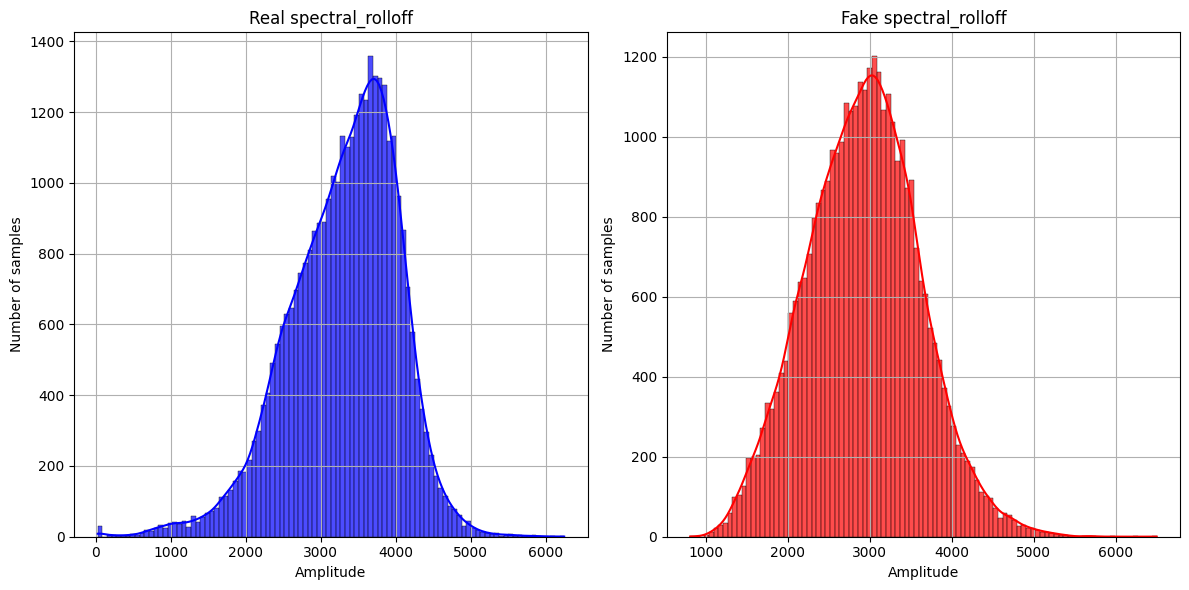

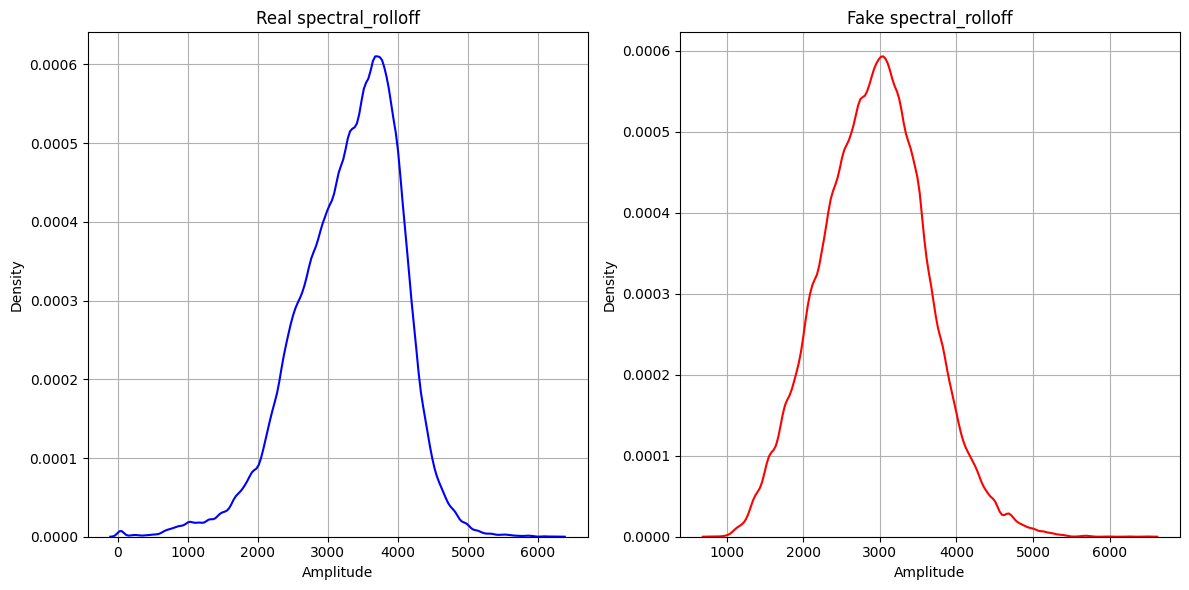

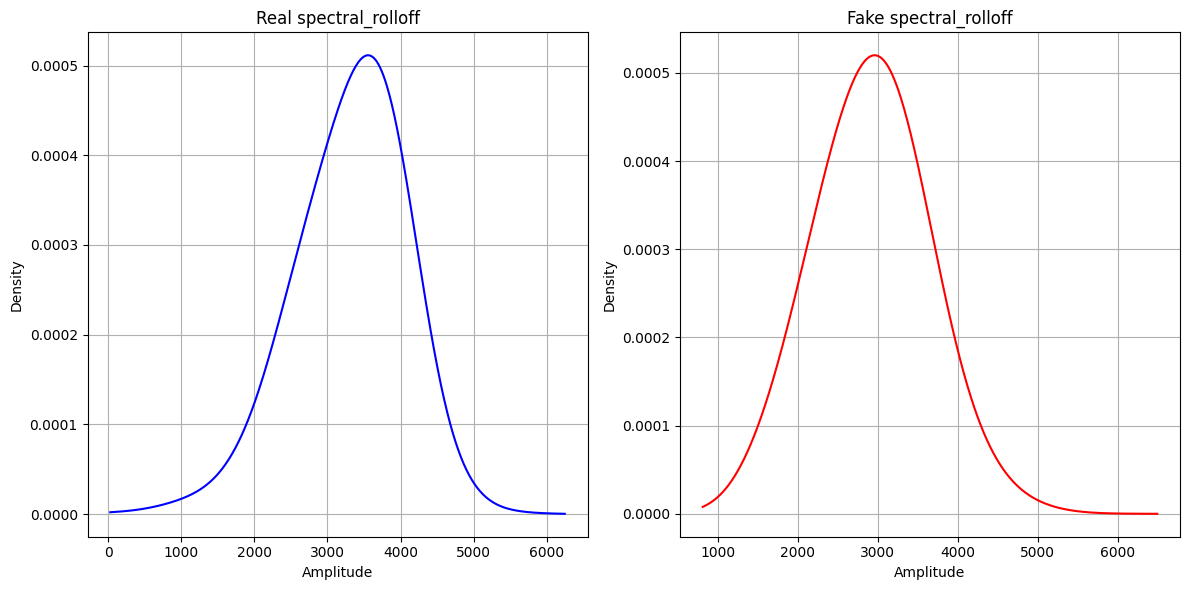

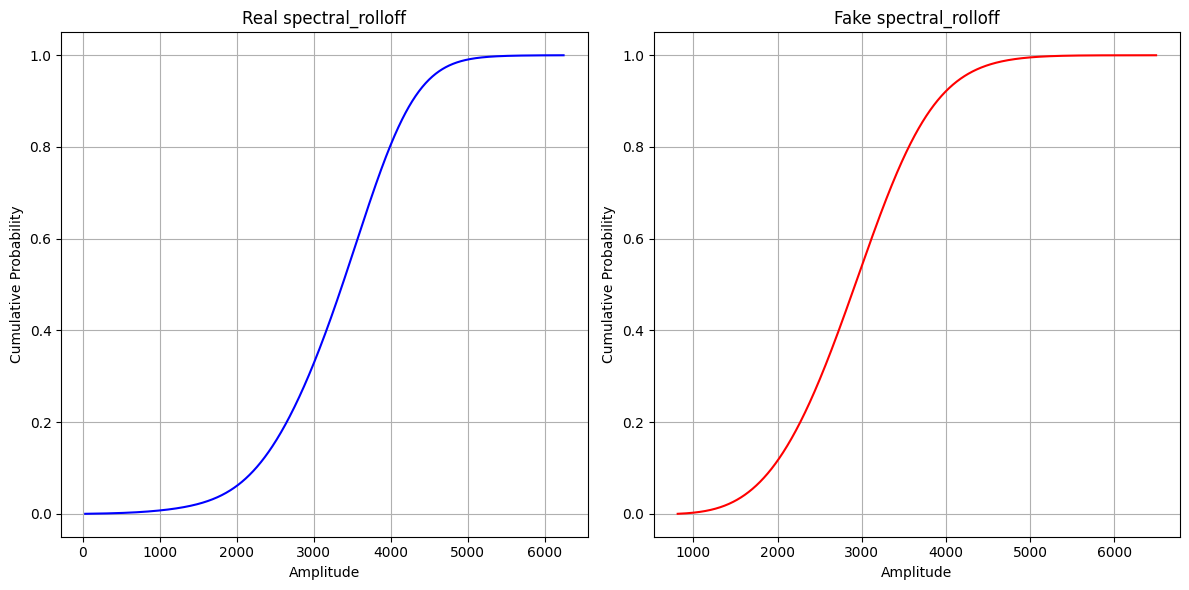

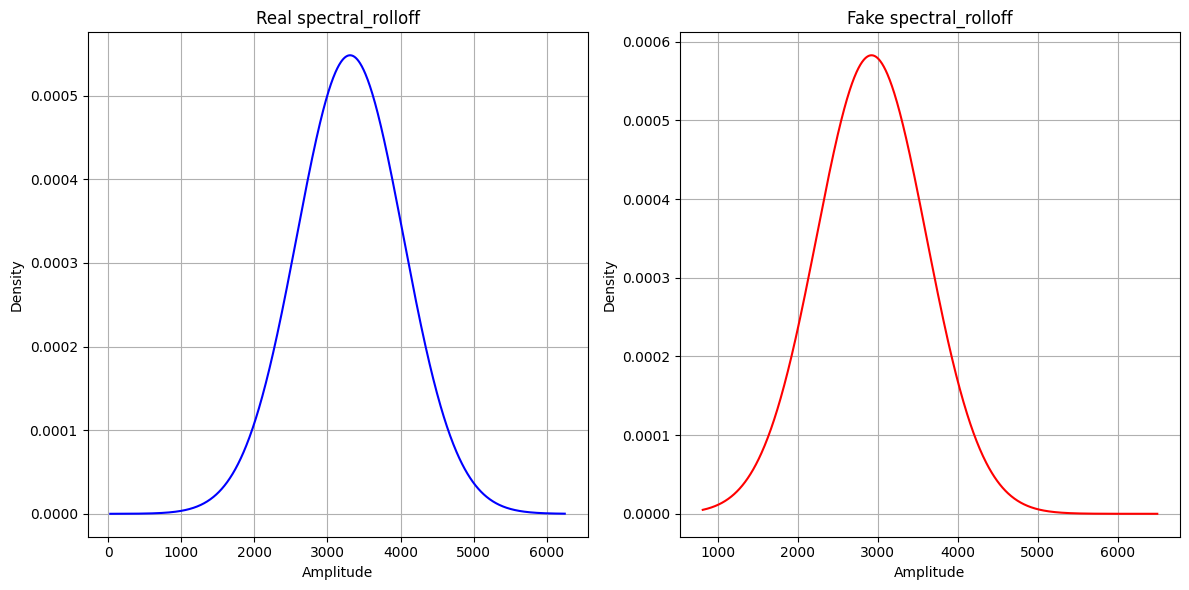

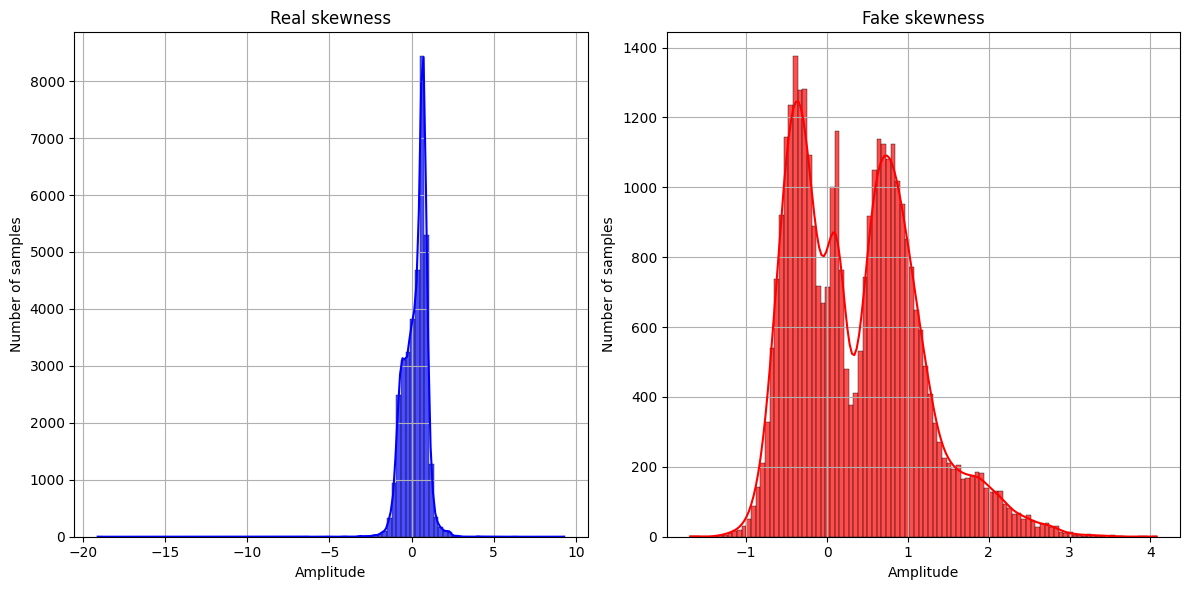

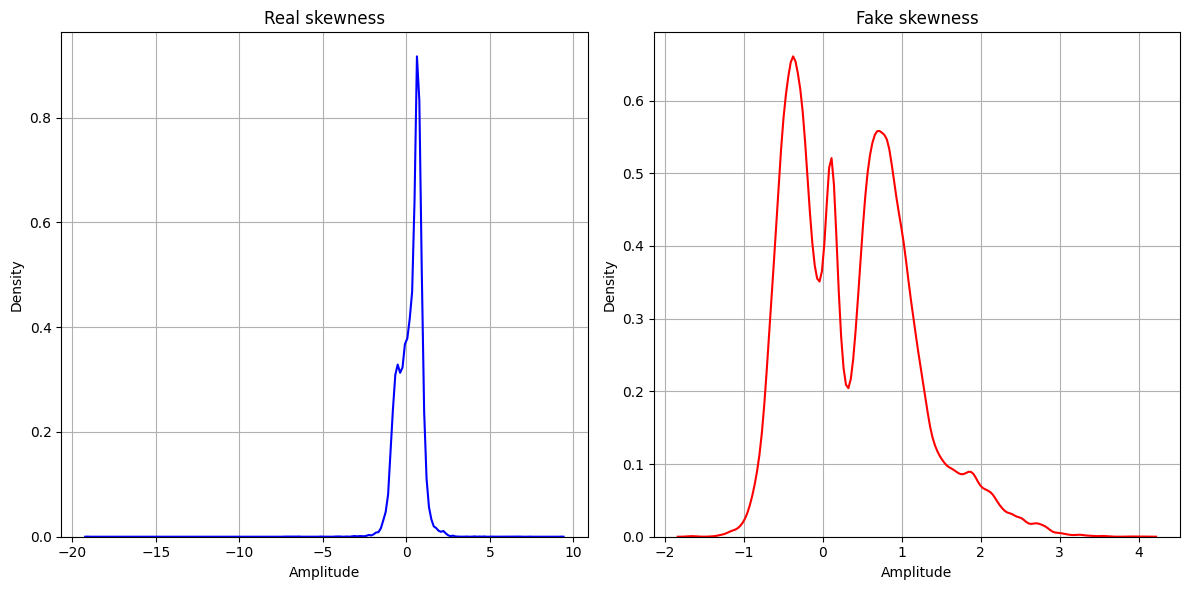

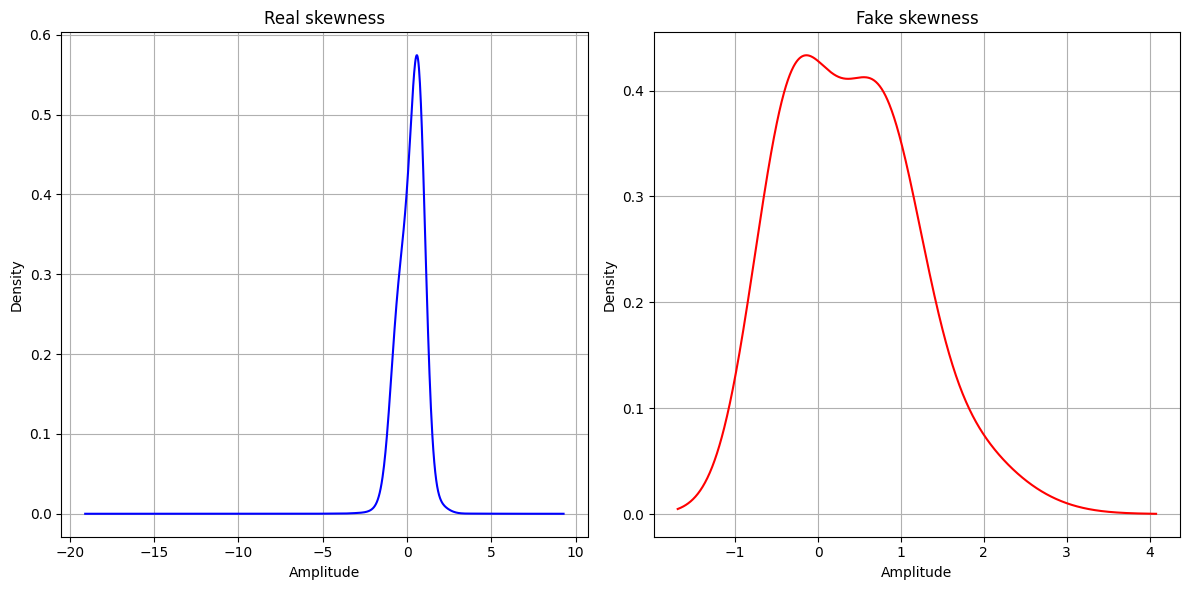

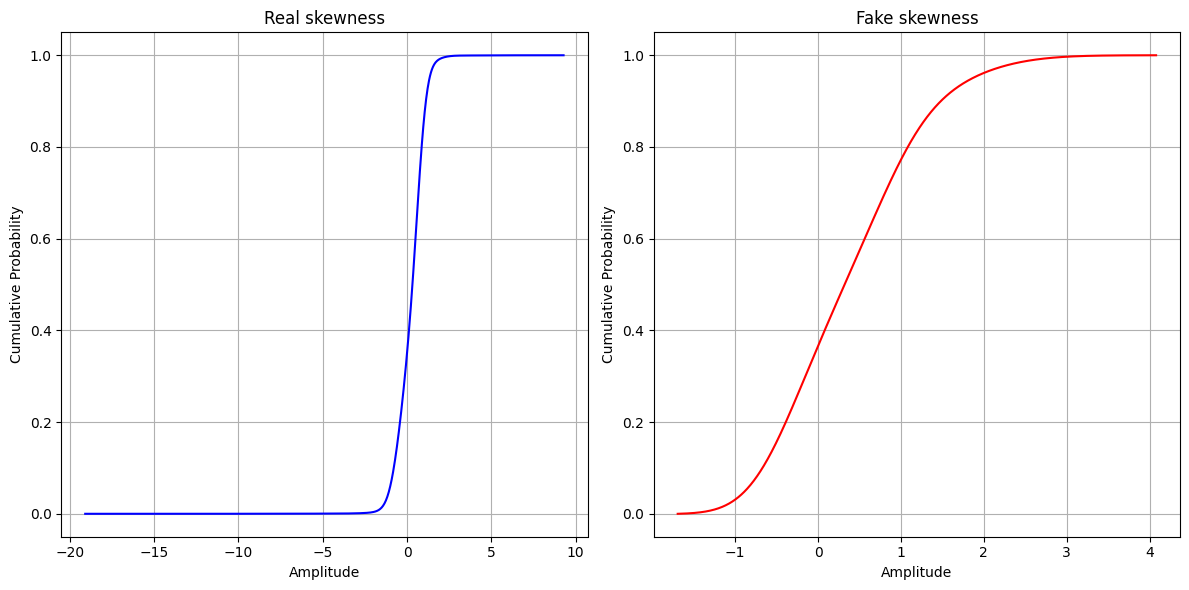

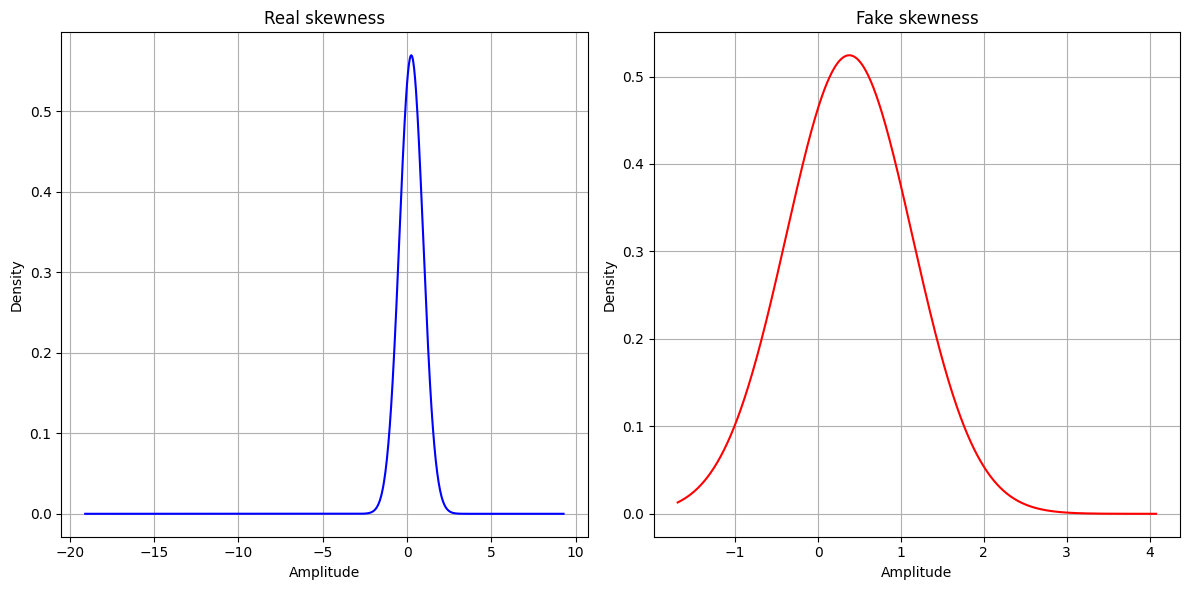

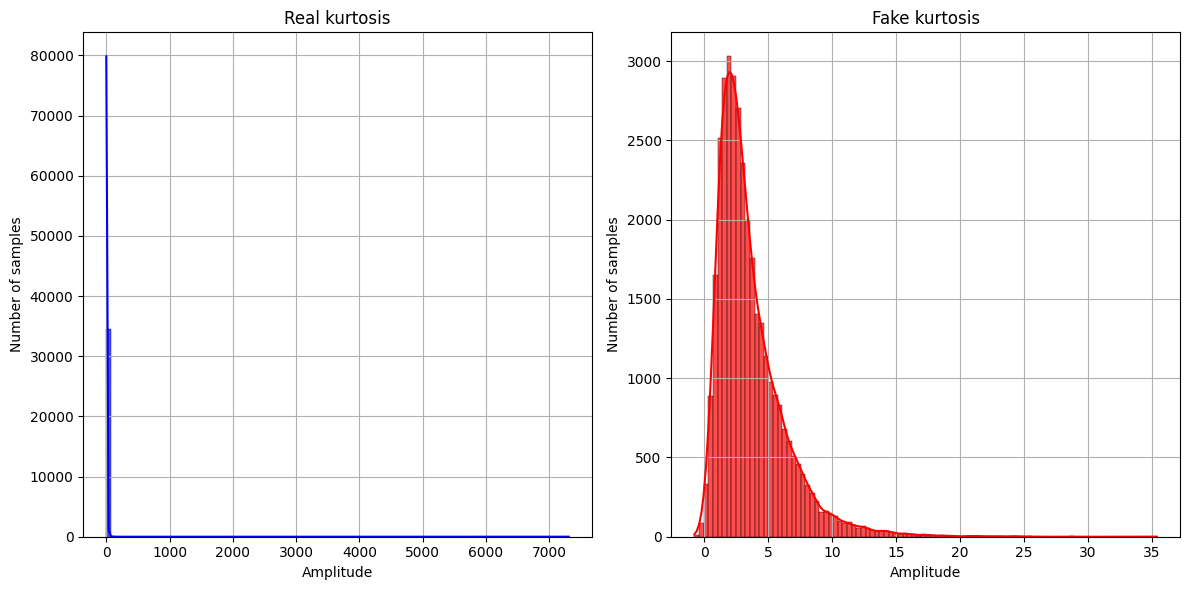

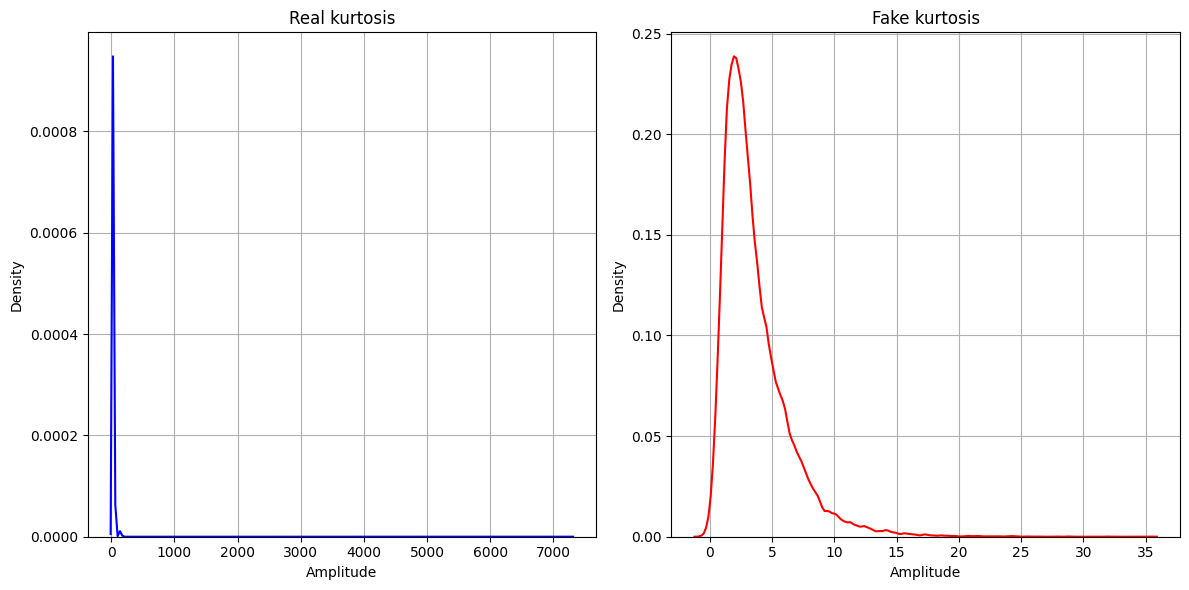

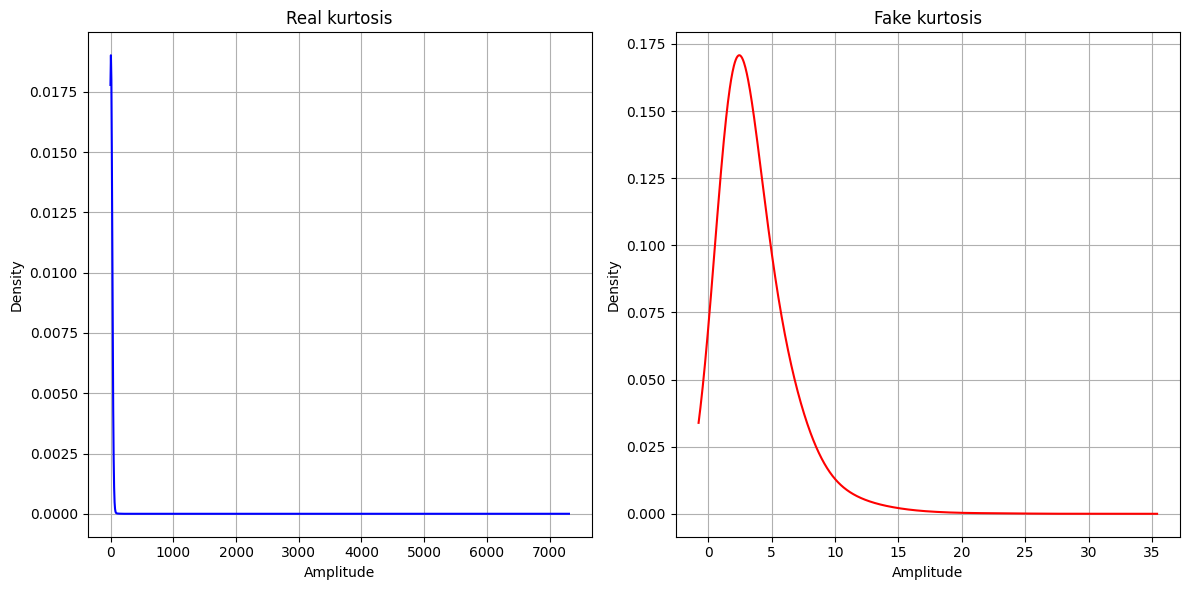

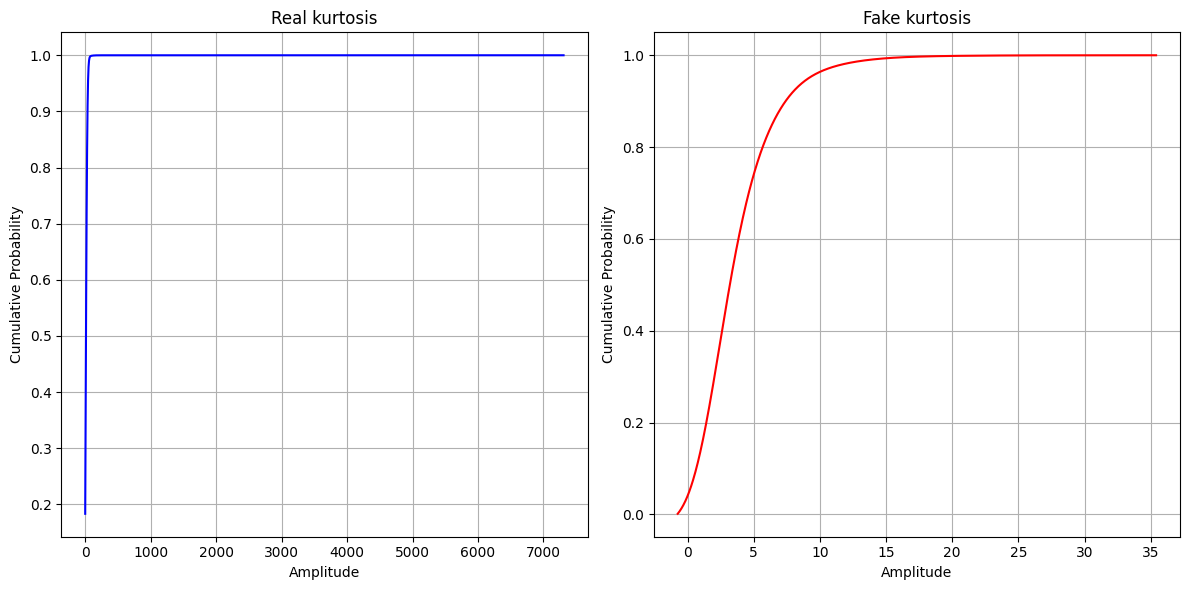

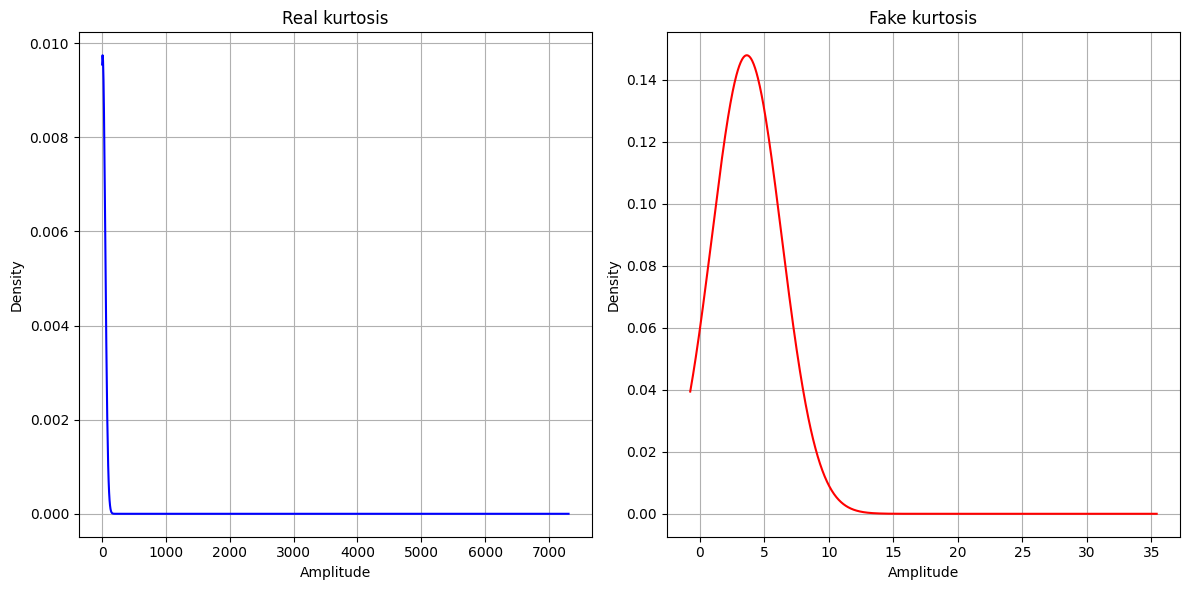

In [15]:
for feature in feature_columns:
    plot_aggregated_features(real_data, fake_data, feature, feature, 'Amplitude', 'Number of samples')
    plot_kde(real_data, fake_data, feature, feature, 'Amplitude', 'Density')
    plot_pdf(real_data, fake_data, feature, feature, 'Amplitude', 'Density')
    plot_cdf(real_data, fake_data, feature, feature, 'Amplitude', 'Cumulative Probability')
    plot_normal_pdf(real_data, fake_data, feature, feature, 'Amplitude', 'Density')